# **Introdução - ARTROSCOPIA DE QUADRIL**

A artroscopia de quadril, procedimento cirúrgico minimamente invasivo para diagnosticar e tratar problemas articulares, tem se tornado cada vez mais comum no contexto da Ortopedia. A identificação prévia dos fatores de risco associados às complicações pós-cirúrgicas é crucial para aprimorar a segurança do paciente, otimizar a tomada de decisão clínica e, consequentemente, melhorar os desfechos cirúrgicos.  
___________
*Este trabalho objetiva desenvolver um modelo preditivo capaz de estimar a probabilidade de ocorrência de complicações após o procedimento de artroscopia de quadril, utilizando técnicas de aprendizado de máquina.*
___________
Para isso, foi analisado um conjunto de dados simulados contendo informações demográficas, clínicas e cirúrgicas de pacientes submetidos ao procedimento. A análise exploratória de dados foi conduzida para identificar padrões e relações entre as variáveis, seguida pela aplicação e comparação de diferentes algoritmos de classificação, incluindo Regressão Logística, Árvore de Decisão, Máquinas de Vetores de Suporte (SVM), Random Forest, Redes Neurais e XGBoost. A performance dos modelos foi avaliada utilizando métricas como acurácia, precisão, recall, F1-score e AUC-ROC, visando selecionar o modelo que oferece a melhor capacidade preditiva para auxiliar na avaliação de risco e no planejamento cirúrgico.

Além da predição, o estudo também explora a possibilidade de segmentar pacientes em grupos com características semelhantes, buscando identificar perfis de risco específicos.


Os resultados obtidos contribuem para o avanço do conhecimento na área ortopédica e oferecem potencial para o desenvolvimento de ferramentas de suporte à decisão clínica, com o objetivo final de melhorar a qualidade do atendimento e a segurança dos pacientes.

In [ ]:
# importação das bibliotecas gerais
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=Warning)
from scipy.stats import f_oneway, chi2_contingency
import sklearn

# modelos e treinamento
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, make_scorer, recall_score, roc_curve, auc, make_scorer, roc_auc_score, silhouette_score
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler, FunctionTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate, cross_val_predict
from sklearn.pipeline import Pipeline as skPipeline
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
!pip install category_encoders
from category_encoders import TargetEncoder
import shap
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from flask import Flask, request, jsonify
import pickle
import tkinter as tk
from tkinter import ttk
!pip install streamlit
import streamlit as st

# **ANÁLISE EXPLORATÓRIA DOS DADOS**

O problema de negócio central é a previsão da ocorrência de complicações (COMPL) após cirurgias artroscópicas de quadril. O notebook irá abordar isso com Análise Exploratória buscando entender os fatores associados a essas complicações.

___

O df é misto, abordando as variáveis numéricas e categóricas:
- **SEXO**: masculino (M) ou feminino (F);
- **IDADE**: idade do paciente;
- **LADO**: lateralidade da cirurgia realizada - esquerdo (E) ou direito (D);
-	**TRACAO**: tempo de tração do membro inferior, em minutos, durante o procedimento;
- **RET_TRACAO**: quantidade de vezes que a tração do membro inferior foi retirada durante o procedimento;
- **INT_TRACAO**: tempo de retirada de tração do membro inferior, em minutos, durante o procedimento;
-	**INDICACAO**: indicação cirúrgica da abordagem artroscópica - LABRAL (lesão labral), CONDRAL (lesão condral) e LABRAL-CONDRAL (lesão em ambos os componentes);
- **IFA**: tipo de Impacto Fêmoro-Acetabular tratado - PINCER, CAME ou MISTO;
-	**PORTAIS**: quantidade de portais artroscópicos utilizado durante o procedimento;
-	**BLOQ_POS**: quantidade de bloqueios anestésicos realizados no período de pós-operatório imediato;
-	**COMPL**: ausência (0) ou presença (1) de complicações pós-cirúrgicas;
-	**TIPO**: tipo de complicação pós-cirúrgica identificada - DSR (Distrofia Simpático-reflexa), DOR MIOFASCIAL ou NEUROPRAXIA;
-	**CONVERSAO_ATQ**: conversão para cirurgia de Artroplastia Total de Quadril no período de acompanhamento - não (0) ou sim (1);
-	**ANCORAS**: quantidade de âncoras (OPME) utilizadas durante o procedimento cirúrgico;
- **TX_REOP**: reabordagem cirúrgica por qualquer motivo no período de acompanhamento - não (0) ou sim (1).

In [ ]:
df = pd.read_excel('/content/DB_Artro.xlsx')
df.head()

SEXO  IDADE LADO  TRACAO  RET_TRACAO  INT_TRACAO       INDICACAO     IFA  \
0     F   45.0    E      67           5        23.0          LABRAL   MISTO   
1     M   38.0    E      83           4        41.0         CONDRAL  PINCER   
2     F   30.0    D      60           2         NaN          LABRAL  PINCER   
3     M   20.0    D      78           4        40.0          LABRAL  PINCER   
4     M   58.0    D     104           4        34.0          LABRAL   MISTO   
5     F   41.0    E      64           2        36.0         CONDRAL  PINCER   
6     F   31.0    E      92           3        33.0          LABRAL  PINCER   
7     F   30.0    E      59           2        15.0         CONDRAL     CAM   
8     F    NaN    E      60           3         NaN          LABRAL  PINCER   
9     M    NaN    D      60           2         NaN          LABRAL     CAM   
10    F   45.0    D     105           4        44.0          LABRAL  PINCER   
11    M   49.0    D     101           2        75.0         CONDRAL     CAM   
12    F   58.0    D      80           3        36.0         CONDRAL   MISTO   
13    M   43.0    E     120           4        54.0          LABRAL  PINCER   
14    F   38.0    D      60           5        29.0  LABRAL-CONDRAL     CAM   
15    F   39.0    E      57           2         5.0          LABRAL  PINCER   
16    F   58.0    E      88           3        41.0  LABRAL-CONDRAL  PINCER   
17    F   46.0    E      76           3        46.0  LABRAL-CONDRAL  PINCER   
18    M   61.0    D      72           3        42.0         CONDRAL   MISTO   
19    F   32.0    E      74           4        41.0         CONDRAL  PINCER   
20    F   47.0    D     131           3        81.0  LABRAL-CONDRAL  PINCER   
21    M   25.0    D     156           3       104.0  LABRAL-CONDRAL     CAM   
22    M   41.0    E      77           4        41.0          LABRAL  PINCER   
23    M    NaN    D      90           5         NaN         CONDRAL     CAM   
24    M   44.0    D      93           2        72.0          LABRAL     CAM   
25    M   40.0    D      91           5        62.0  LABRAL-CONDRAL  PINCER   
26    F   45.0    E     125           6        51.0          LABRAL  PINCER   
27    F   45.0    D     102           3        15.0          LABRAL  PINCER   
28    F   60.0    E     113           3        46.0  LABRAL-CONDRAL  PINCER   
29  NaN   58.0    D      91           3        56.0  LABRAL-CONDRAL  PINCER   

    PORTAIS  BLOQ_POS  COMPL TIPO  CONVERSAO_ATQ  ANCORAS  TX_REOP  
0         3         1      0  NaN            0.0      NaN      NaN  
1         3         0      0  NaN            0.0      NaN      NaN  
2         3         0      0  NaN            NaN      NaN      NaN  
3         3         0      0  NaN            0.0      NaN      NaN  
4         3         1      0  NaN            0.0      NaN      NaN  
5         3         0      0  NaN            0.0      NaN      NaN  
6         3         1      0  NaN            0.0      NaN      NaN  
7         3         1      1  DSR            0.0      NaN      NaN  
8         3         1      0  NaN            NaN      NaN      NaN  
9         3         0      0  NaN            NaN      NaN      NaN  
10        3         1      0  NaN            0.0      NaN      NaN  
11        2         0      0  NaN            0.0      NaN      NaN  
12        3         0      0  NaN            0.0      NaN      0.0  
13        2         0      0  NaN            1.0      NaN      NaN  
14        3         1      0  NaN            0.0      NaN      NaN  
15        2         1      0  NaN            0.0      NaN      NaN  
16        2         1      0  NaN            0.0      NaN      NaN  
17        3         0      0  NaN            0.0      NaN      NaN  
18        3         0      0  NaN            0.0      NaN      NaN  
19        3         1      0  NaN            0.0      NaN      NaN  
20        2         1      0  NaN            0.0      NaN      NaN  
21        3         1      0  NaN  

In [ ]:
# analisando as colunas do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEXO           583 non-null    object 
 1   IDADE          575 non-null    float64
 2   LADO           585 non-null    object 
 3   TRACAO         585 non-null    int64  
 4   RET_TRACAO     585 non-null    int64  
 5   INT_TRACAO     549 non-null    float64
 6   INDICACAO      584 non-null    object 
 7   IFA            581 non-null    object 
 8   PORTAIS        585 non-null    int64  
 9   BLOQ_POS       585 non-null    int64  
 10  COMPL          585 non-null    int64  
 11  TIPO           115 non-null    object 
 12  CONVERSAO_ATQ  579 non-null    float64
 13  ANCORAS        550 non-null    float64
 14  TX_REOP        553 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 68.7+ KB


In [ ]:
# analisando o formato do dataframe

df.shape

(585, 15)

In [ ]:
# analisando as variáveis numéricas do dataframe

df.describe()

IDADE      TRACAO  RET_TRACAO  INT_TRACAO     PORTAIS    BLOQ_POS  \
count  575.000000  585.000000  585.000000  549.000000  585.000000  585.000000   
mean    44.093913   91.263248    3.863248   48.626594    2.680342    0.772650   
std     10.424185   26.819394    1.328726   22.084792    0.515553    0.419479   
min     19.000000   43.000000    2.000000    5.000000    2.000000    0.000000   
25%     38.000000   72.000000    3.000000   35.000000    2.000000    1.000000   
50%     45.000000   90.000000    4.000000   42.000000    3.000000    1.000000   
75%     53.000000  107.000000    5.000000   62.000000    3.000000    1.000000   
max     61.000000  156.000000    7.000000  104.000000    4.000000    1.000000   

            COMPL  CONVERSAO_ATQ     ANCORAS     TX_REOP  
count  585.000000     579.000000  550.000000  553.000000  
mean     0.196581       0.050086    1.785455    0.005425  
std      0.397753       0.218312    0.707343    0.073521  
min      0.000000       0.000000    0.000000    0.000000  
25%      0.000000       0.000000    1.000000    0.000000  
50%      0.000000       0.000000    2.000000    0.000000  
75%      0.000000       0.000000    2.000000    0.000000  
max      1.000000       1.000000    3.000000    1.000000

In [ ]:
# analisando as variáveis categóricas do dataset

df.describe(include='object')

SEXO LADO       INDICACAO     IFA            TIPO
count   583  585             584     581             115
unique    2    2               3       3               3
top       M    D  LABRAL-CONDRAL  PINCER  DOR MIOFASCIAL
freq    306  335             326     263             109

In [ ]:
# analisando a presença de valores nulos ou inconsistentes no dataset

dados_nulos = df.isnull().sum()
print(dados_nulos)

SEXO               2
IDADE             10
LADO               0
TRACAO             0
RET_TRACAO         0
INT_TRACAO        36
INDICACAO          1
IFA                4
PORTAIS            0
BLOQ_POS           0
COMPL              0
TIPO             470
CONVERSAO_ATQ      6
ANCORAS           35
TX_REOP           32
dtype: int64


In [ ]:
# dados nulos em percentual

dados_nulos = (df.isnull().sum() / len(df)) * 100
print(dados_nulos)

SEXO              0.341880
IDADE             1.709402
LADO              0.000000
TRACAO            0.000000
RET_TRACAO        0.000000
INT_TRACAO        6.153846
INDICACAO         0.170940
IFA               0.683761
PORTAIS           0.000000
BLOQ_POS          0.000000
COMPL             0.000000
TIPO             80.341880
CONVERSAO_ATQ     1.025641
ANCORAS           5.982906
TX_REOP           5.470085
dtype: float64


___
**Possíveis questionamentos de Interesse:**


- Quais variáveis demográficas (idade, sexo) ou clínicas (tipo de lesão, indicação, quantidade de âncoras utilizadas) estão mais relacionadas com a ocorrência de complicações pós-cirúrgicas?

- Existem padrões específicos nos valores das variáveis numéricas que diferenciam pacientes com e sem complicações?

- A combinação de certos fatores demográficos ou clínicos aumenta o risco de complicações nestes pacientes?

- Qual a prevalência de complicações no conjunto de dados? Isso é um problema de classes desbalanceadas?
___


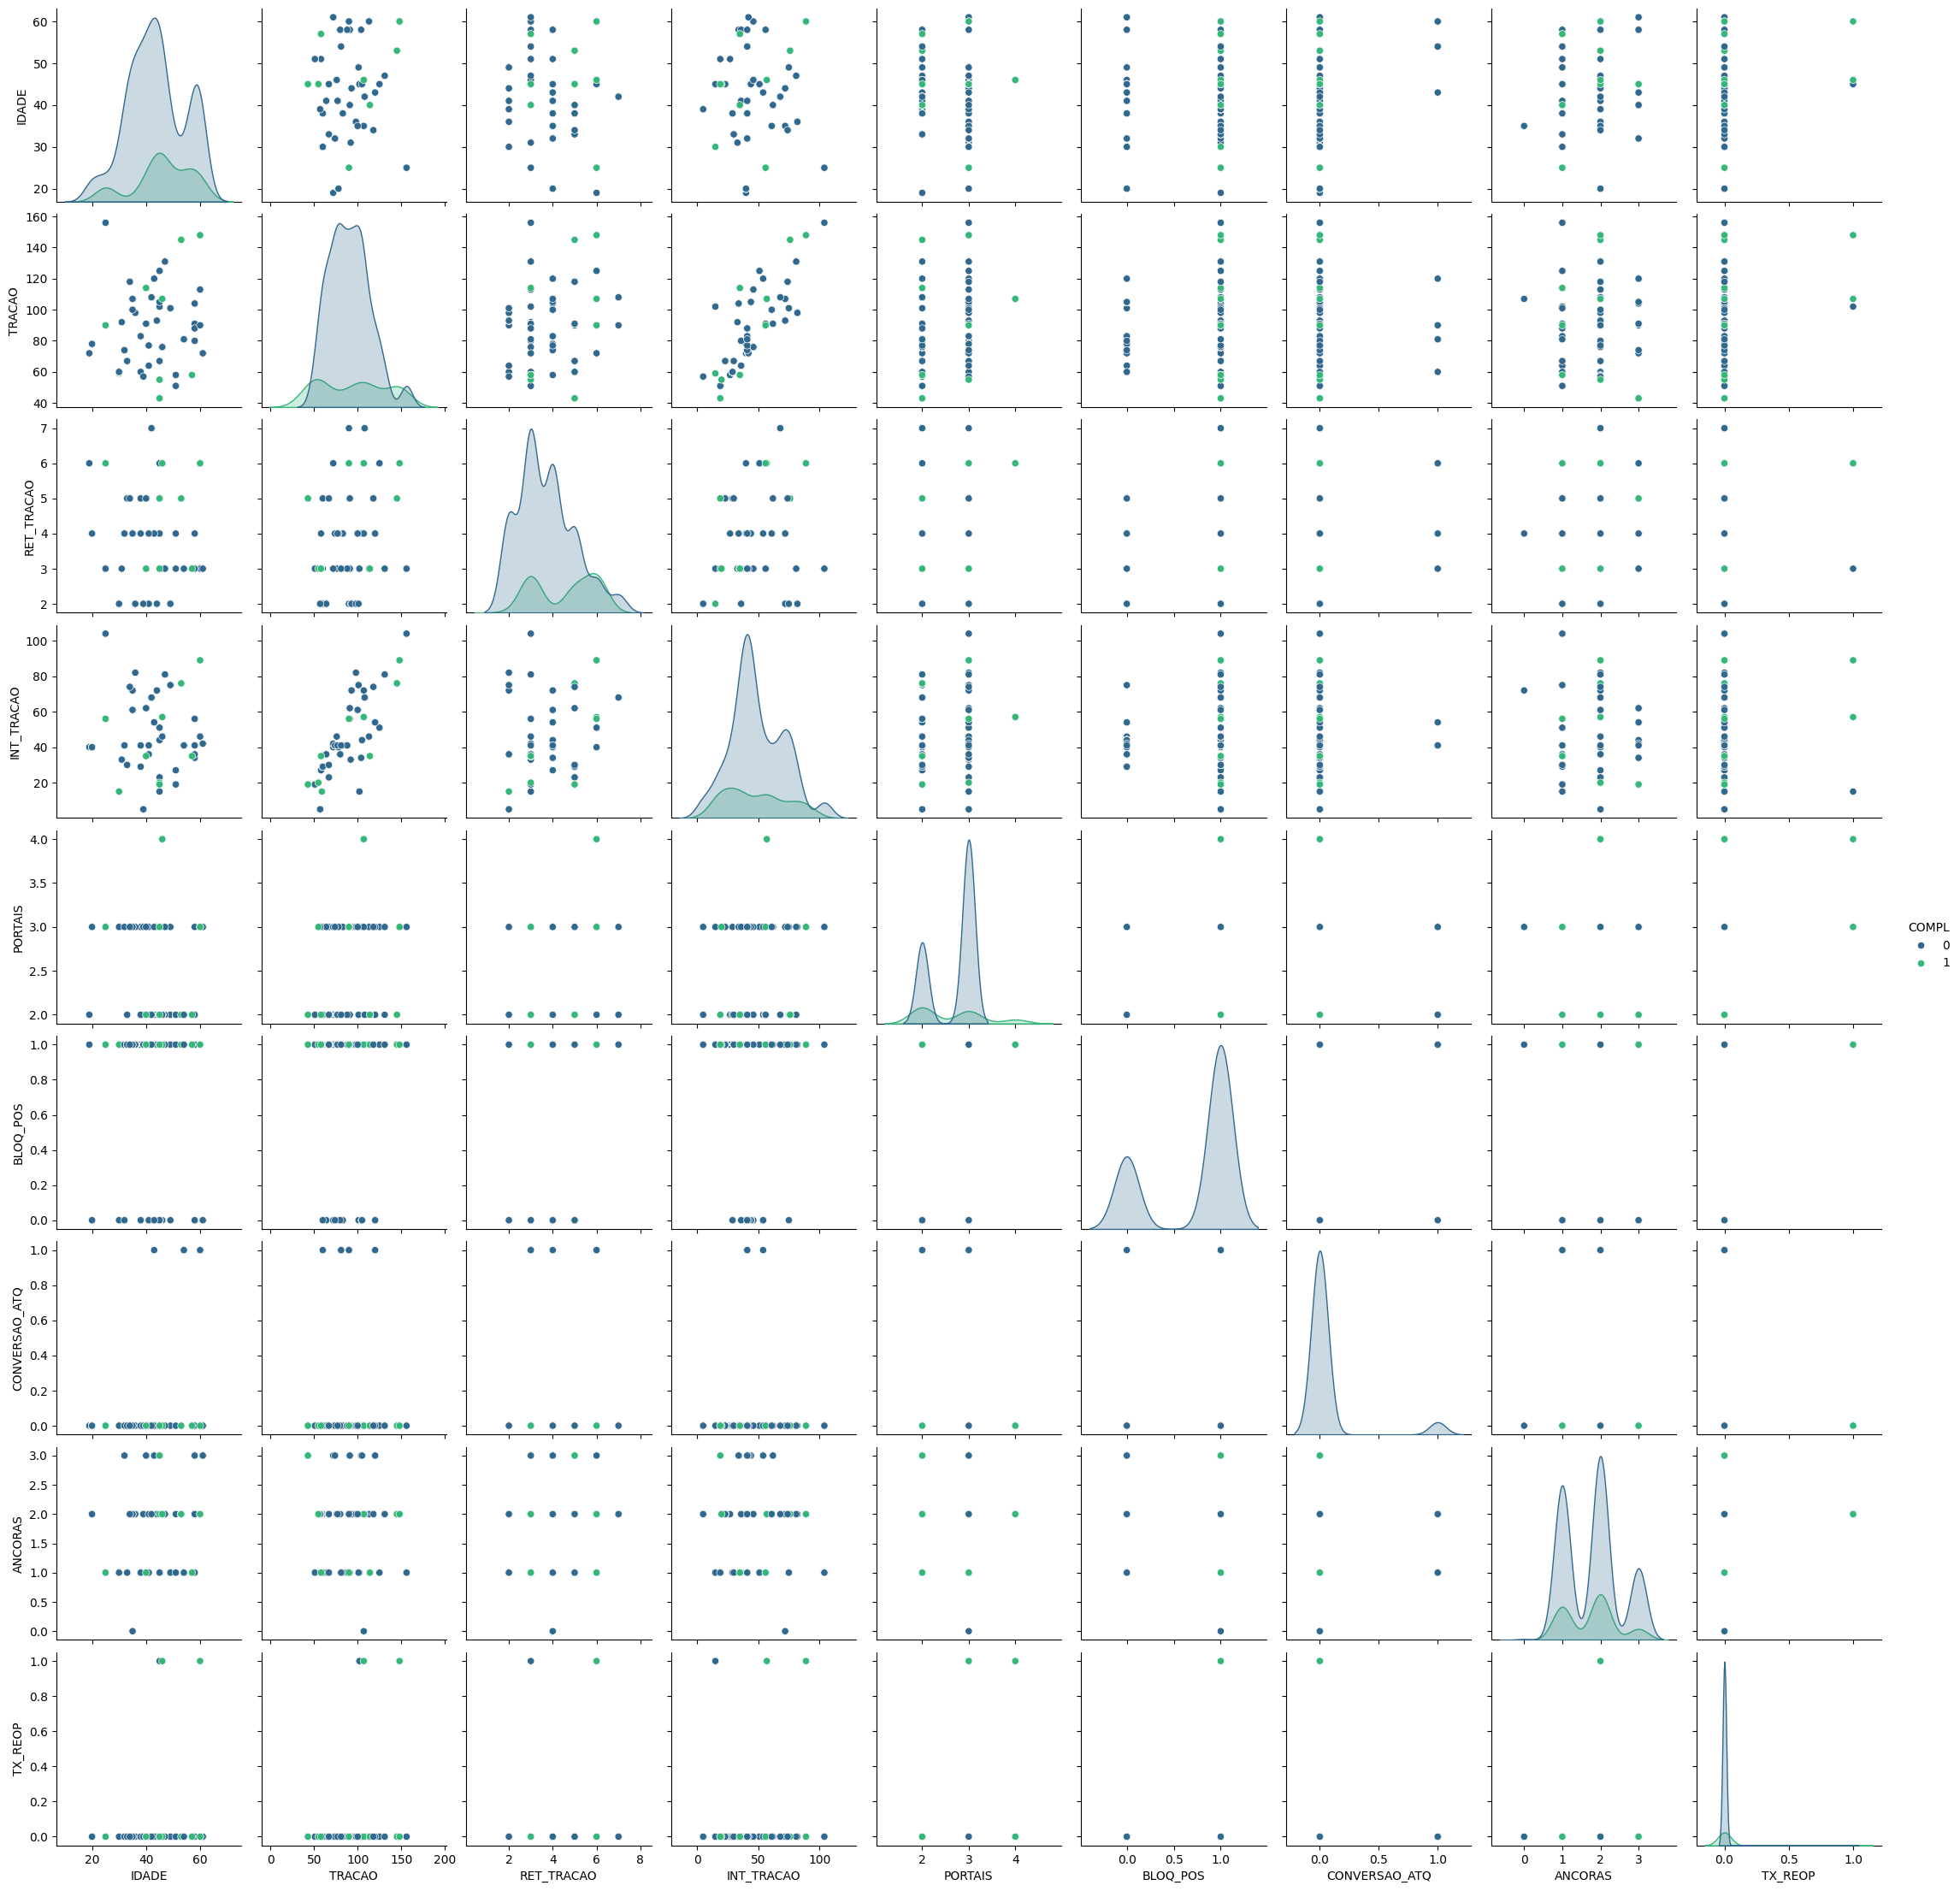

In [ ]:
sns.pairplot(df, hue='COMPL', palette='viridis')
plt.show()

COMPL
0    470
1    115
Name: count, dtype: int64


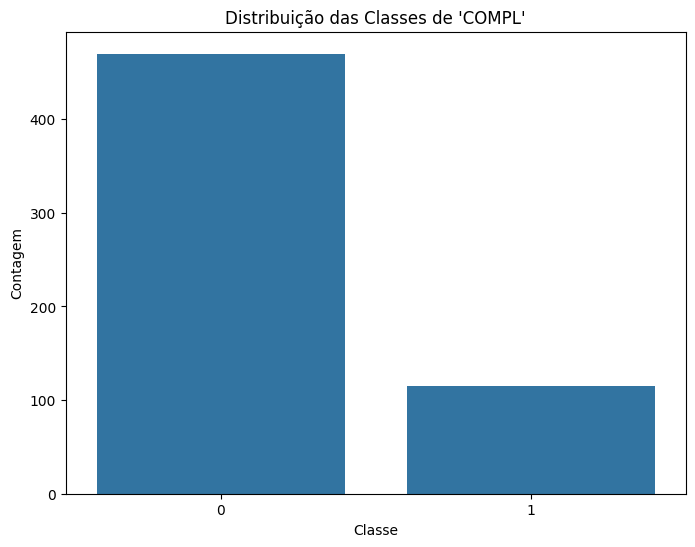

In [ ]:
#Análise da Distribuição das Classes
#Como COMPL é a variável-alvo, é importante verificar a proporção de cada classe para entender o balanceamento do dataset. Isso nos ajuda a avaliar se o dataset está balanceado ou se há predominância de uma classe.

# Contagem de classes em 'COMPL'
class_distribution = df['COMPL'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='COMPL')
plt.title("Distribuição das Classes de 'COMPL'")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

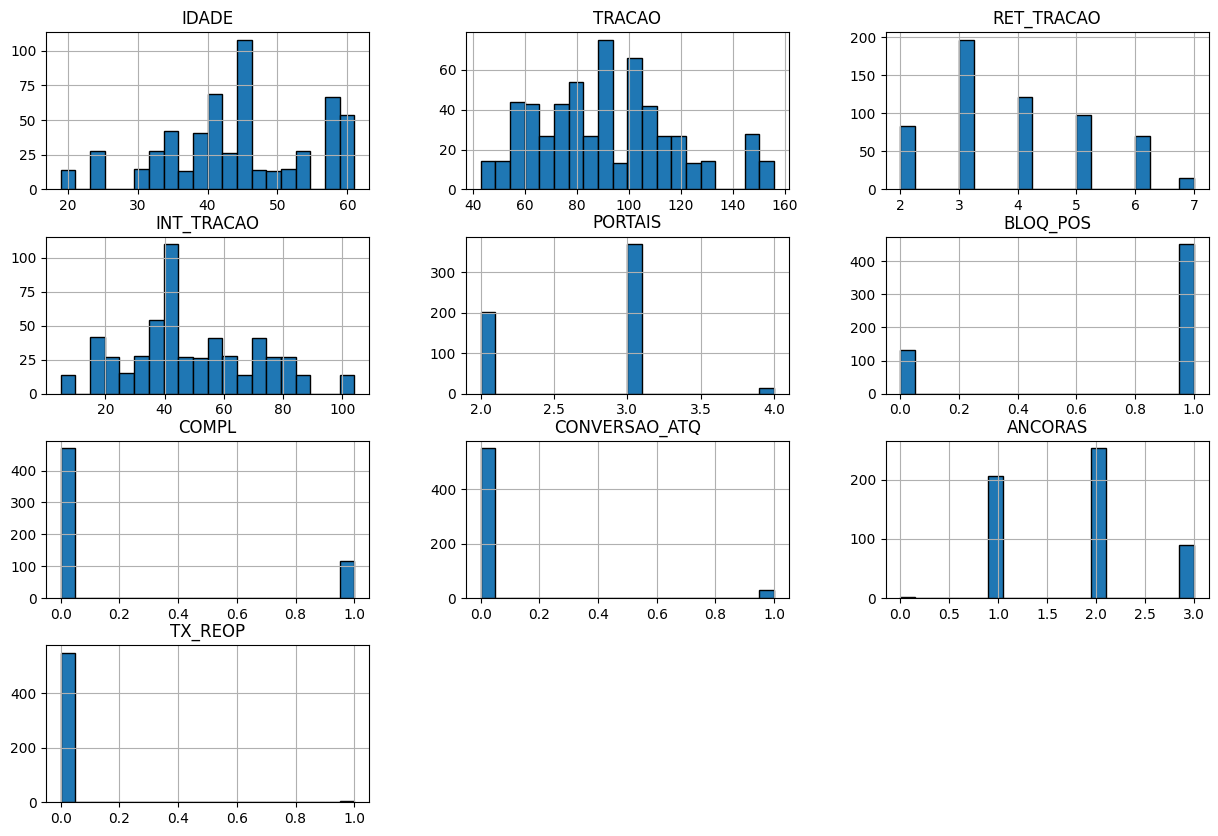

In [ ]:
# Distribuição dos dados nas variáveis numéricas

df.hist(bins=20, figsize=(15, 10), edgecolor='k')
plt.show()

In [ ]:
df.columns

Index(['SEXO', 'IDADE', 'LADO', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO',
       'INDICACAO', 'IFA', 'PORTAIS', 'BLOQ_POS', 'COMPL', 'TIPO',
       'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'],
      dtype='object')

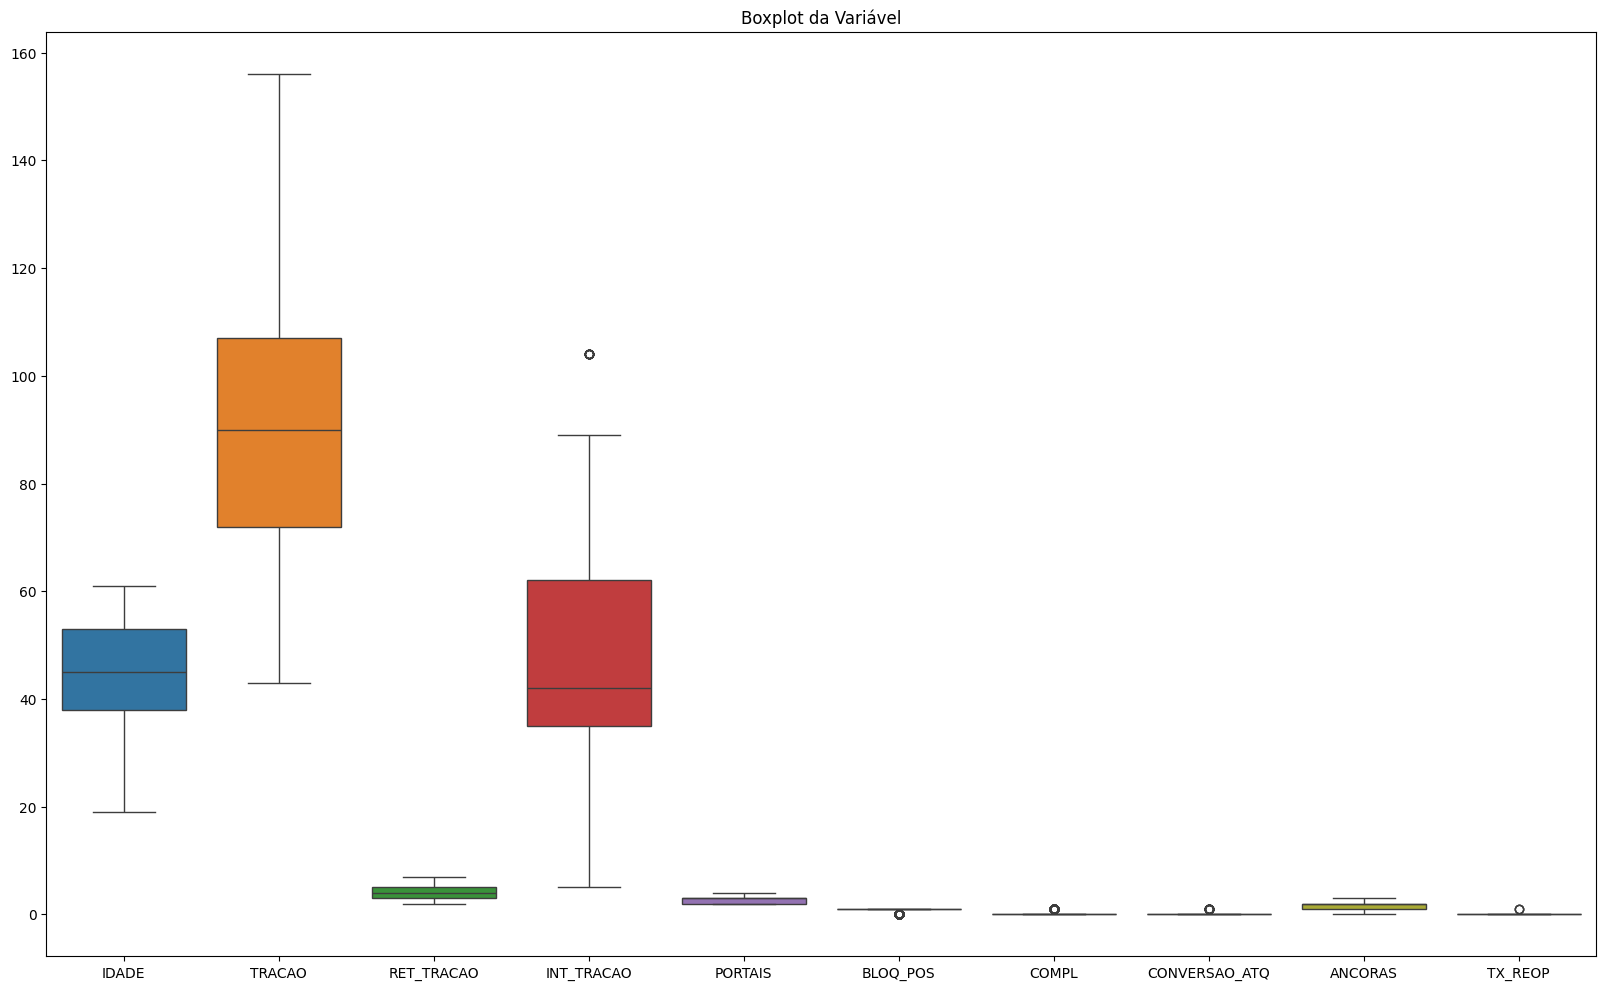

In [ ]:
# Verificação de outliers através de boxplot das variáveis numéricas

plt.figure(figsize=(20, 12))
sns.boxplot(data=df[['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO',
       'PORTAIS', 'BLOQ_POS', 'COMPL',
       'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP']])
plt.title('Boxplot da Variável')
plt.show()

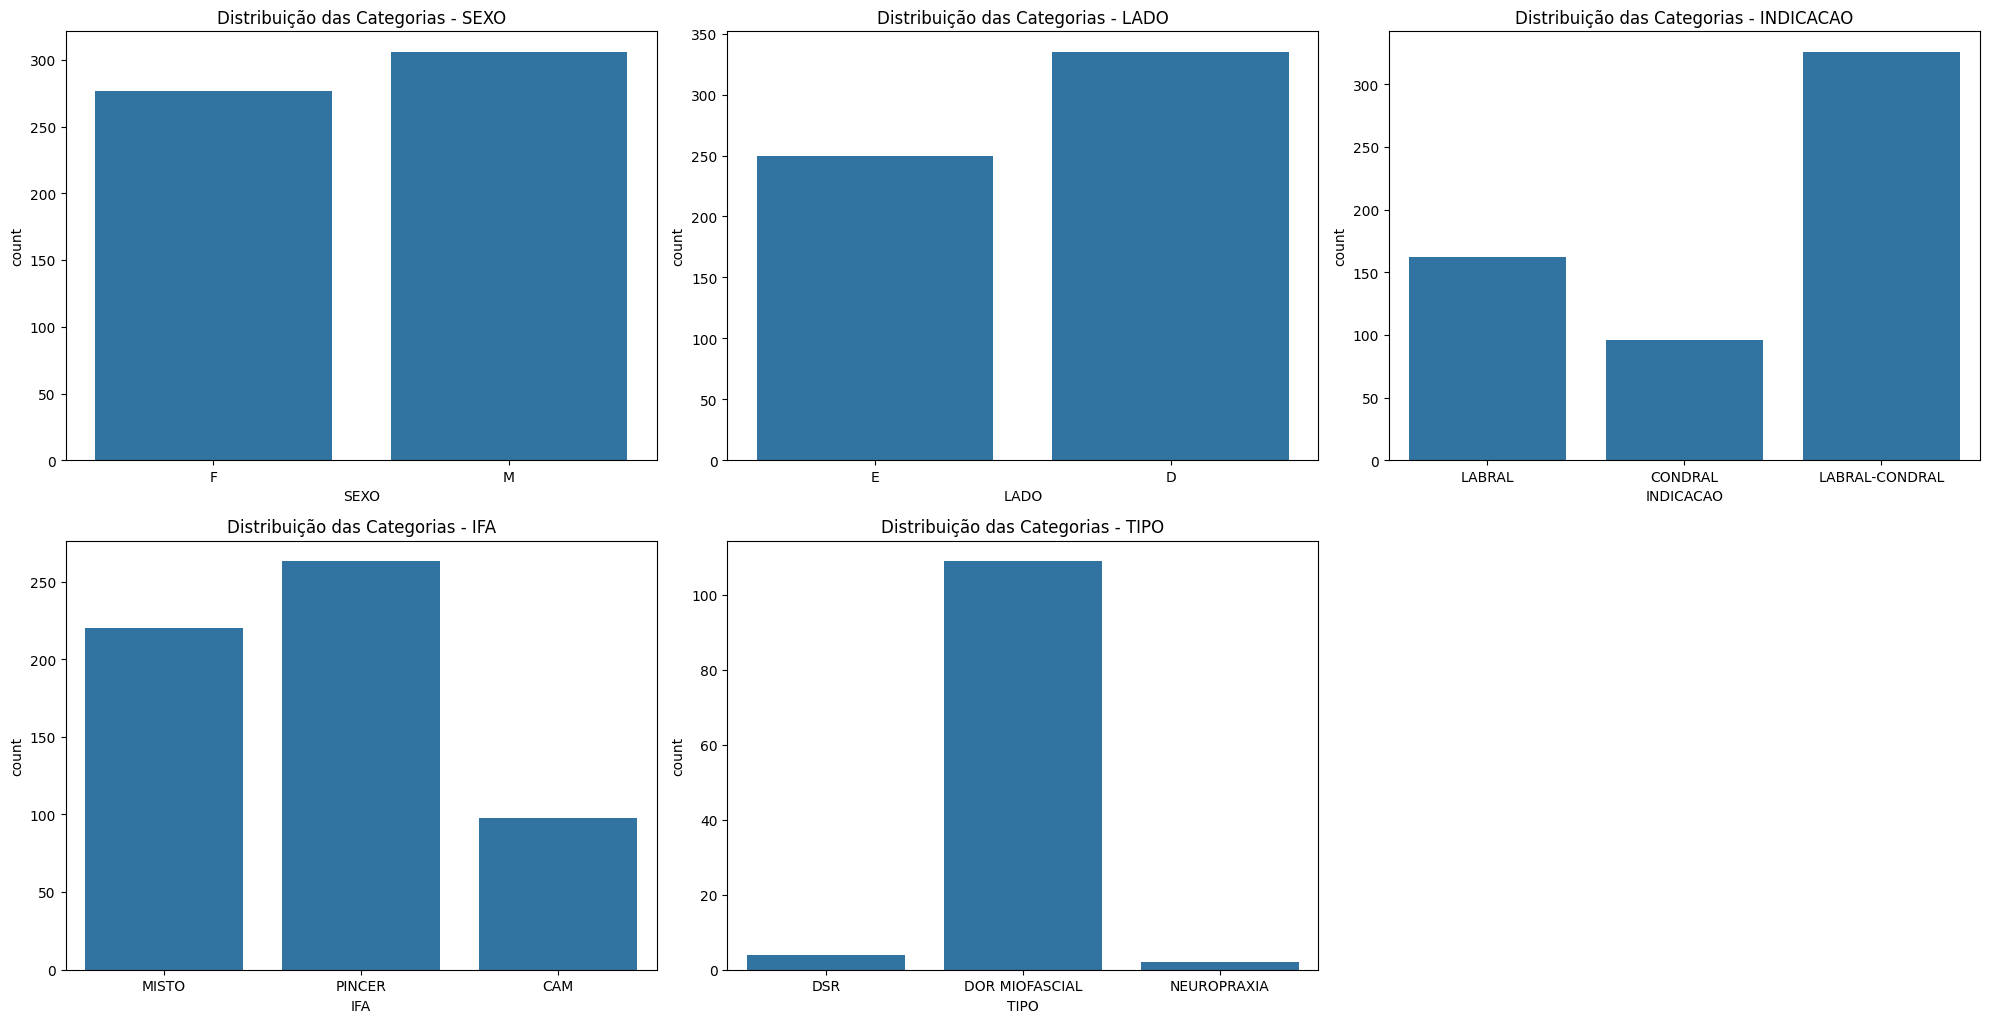

In [ ]:
# Distribuição dos dados nas variáveis categóricas

plt.figure(figsize=(20, 15))
categorical_vars = ['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO']
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribuição das Categorias - {var}')
    plt.tight_layout()

plt.show()

# **ANÁLISE DE CORRELAÇÃO E ASSOCIAÇÃO ESTATÍSTICA**

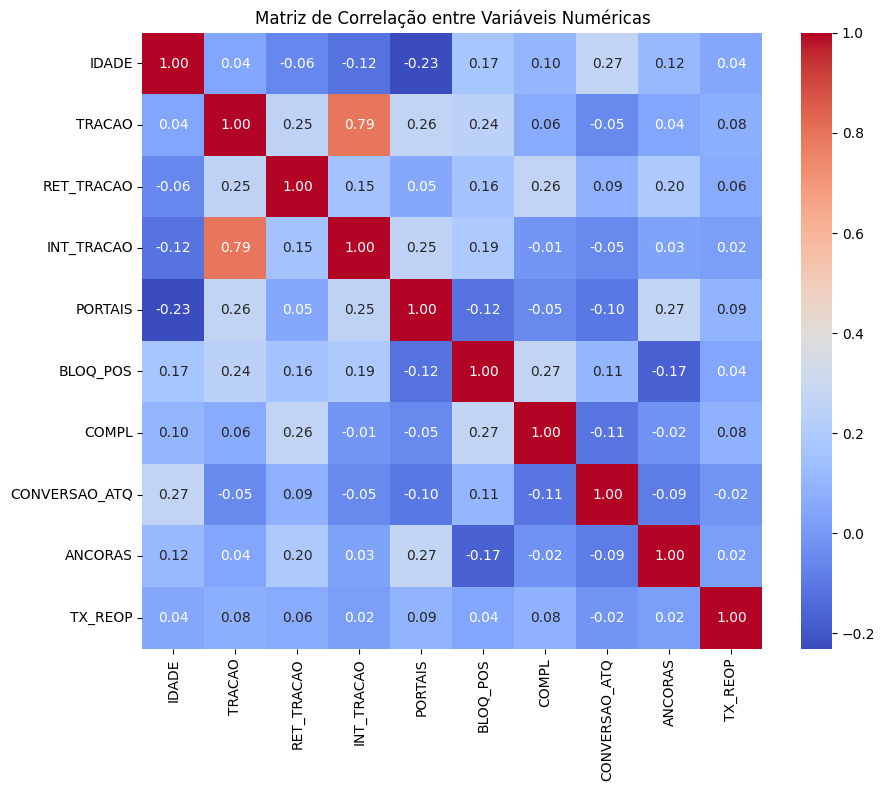

In [ ]:
#Análise de Correlação com Variáveis Numéricas
#A correlação ajuda a identificar quais variáveis numéricas estão mais associadas à variável-alvo COMPL. O coeficiente de correlação de Pearson é uma boa medida para variáveis contínuas.

# Selecionando apenas as variáveis numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
# Calculando a correlação com 'COMPL'
correlation_with_target = correlation_matrix['COMPL'].abs().sort_values(ascending=False)
print(correlation_with_target)

COMPL            1.000000
BLOQ_POS         0.268322
RET_TRACAO       0.264790
CONVERSAO_ATQ    0.114316
IDADE            0.101436
TX_REOP          0.084075
TRACAO           0.061595
PORTAIS          0.052100
ANCORAS          0.022480
INT_TRACAO       0.012620
Name: COMPL, dtype: float64


In [ ]:
# Análise de associação estatística com teste ANOVA das variáveis numéricas

df_num = df.dropna(subset=['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS', 'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'])
numerical_vars = ['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS', 'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP']

# Dicionário para armazenar os resultados de ANOVA
anova_results = {}

# Loop para realizar ANOVA para cada variável numérica em relação a 'COMPL'
for var in numerical_vars:
    # Agrupar os dados de acordo com as categorias de 'COMPL'
    groups = [df[df['COMPL'] == category][var].dropna() for category in df['COMPL'].unique()]

    # Realizar o teste ANOVA
    f_stat, p_value = f_oneway(*groups)

    # Armazenar os resultados
    anova_results[var] = {'F-Estatística': f_stat, 'p-valor': p_value}

    print(f"Variável: {var}")
    print(f"F-Estatística: {f_stat}, p-valor: {p_value}")
    print("-" * 50)

# Convertendo os resultados para um DataFrame para uma visualização mais organizada (opcional)
anova_df = pd.DataFrame(anova_results).T
anova_df

Variável: IDADE
F-Estatística: 5.957010050666208, p-valor: 0.014960671547520064
--------------------------------------------------
Variável: TRACAO
F-Estatística: 2.220303576626872, p-valor: 0.13674706589475163
--------------------------------------------------
Variável: RET_TRACAO
F-Estatística: 43.95828082891235, p-valor: 7.65586446046233e-11
--------------------------------------------------
Variável: INT_TRACAO
F-Estatística: 0.08712551119230412, p-valor: 0.7679757826332381
--------------------------------------------------
Variável: PORTAIS
F-Estatística: 1.5868084195983454, p-valor: 0.20828675838679966
--------------------------------------------------
Variável: BLOQ_POS
F-Estatística: 45.23059169646709, p-valor: 4.1864068201855936e-11
--------------------------------------------------
Variável: CONVERSAO_ATQ
F-Estatística: 7.640184225676456, p-valor: 0.0058905723689696345
--------------------------------------------------
Variável: ANCORAS
F-Estatística: 0.2770710630271982, p-va

F-Estatística       p-valor
IDADE               5.957010  1.496067e-02
TRACAO              2.220304  1.367471e-01
RET_TRACAO         43.958281  7.655864e-11
INT_TRACAO          0.087126  7.679758e-01
PORTAIS             1.586808  2.082868e-01
BLOQ_POS           45.230592  4.186407e-11
CONVERSAO_ATQ       7.640184  5.890572e-03
ANCORAS             0.277071  5.988404e-01
TX_REOP             3.922525  4.814016e-02

In [ ]:
#2. Análise de Correlação com Variáveis Categóricas
#A correlação ajuda a identificar quais variáveis categóricas estão mais associadas à variável-alvo COMPL. A associação estatística utilizada é o teste do Qui-quadrado, útil para análise de variáveis categóricas.
# Criação da tabela de contingência para variável 'SEXO' e gráfico de distribuição
pd.crosstab(df['SEXO'], df['COMPL'], normalize='index')

COMPL         0         1
SEXO                     
F      0.794224  0.205776
M      0.810458  0.189542

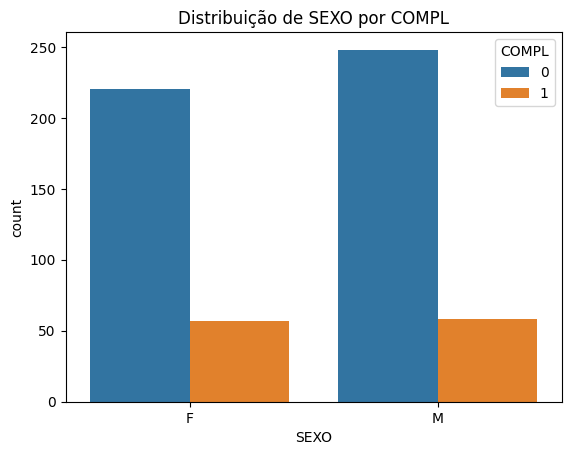

In [ ]:
sns.countplot(data=df, x='SEXO', hue='COMPL')
plt.title('Distribuição de SEXO por COMPL')
plt.show()

In [ ]:
# Criação da tabela de contingência para variável 'LADO' e gráfico de distribuição
pd.crosstab(df['LADO'], df['COMPL'], normalize='index')

COMPL         0         1
LADO                     
D      0.826866  0.173134
E      0.772000  0.228000

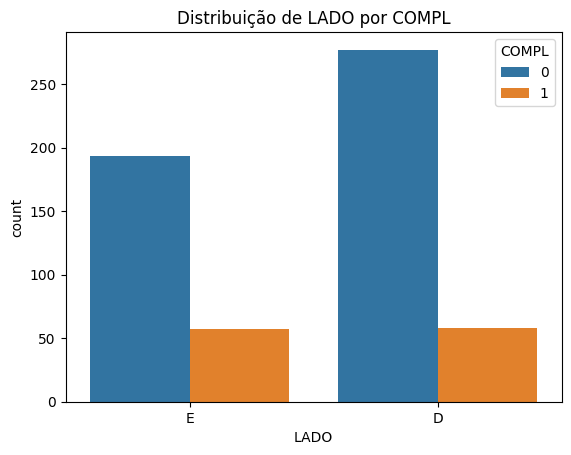

In [ ]:
sns.countplot(data=df, x='LADO', hue='COMPL')
plt.title('Distribuição de LADO por COMPL')
plt.show()

In [ ]:
# Criação da tabela de contingência para variável 'INDICACAO' e gráfico de distribuição
pd.crosstab(df['INDICACAO'], df['COMPL'], normalize='index')

COMPL                  0         1
INDICACAO                         
CONDRAL         0.989583  0.010417
LABRAL          0.993827  0.006173
LABRAL-CONDRAL  0.653374  0.346626

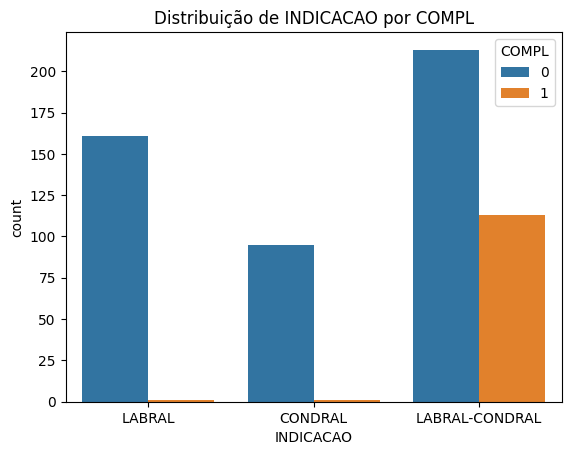

In [ ]:
sns.countplot(data=df, x='INDICACAO', hue='COMPL')
plt.title('Distribuição de INDICACAO por COMPL')
plt.show()

In [ ]:
# Criação da tabela de contingência para variável 'IFA' e gráfico de distribuição
pd.crosstab(df['IFA'], df['COMPL'], normalize='index')

COMPL          0         1
IFA                       
CAM     0.846939  0.153061
MISTO   0.622727  0.377273
PINCER  0.946768  0.053232

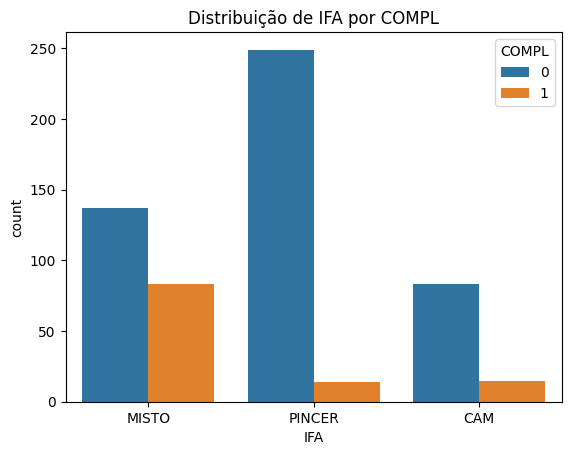

In [ ]:
sns.countplot(data=df, x='IFA', hue='COMPL')
plt.title('Distribuição de IFA por COMPL')
plt.show()

In [ ]:
# Avaliação de associação estatística através do teste Qui-quadrado
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['COMPL'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Variável: {var}")
    print(f"Qui-quadrado: {chi2}, p-valor: {p}")
    print("-------------")

Variável: SEXO
Qui-quadrado: 0.15030823616770334, p-valor: 0.698240970678655
-------------
Variável: LADO
Qui-quadrado: 2.3923080964281276, p-valor: 0.12193348136617944
-------------
Variável: INDICACAO
Qui-quadrado: 104.58852458174971, p-valor: 1.9448694383173915e-23
-------------
Variável: IFA
Qui-quadrado: 82.02819976334581, p-valor: 1.5410003634941058e-18
-------------
Variável: TIPO
Qui-quadrado: 0.0, p-valor: 1.0
-------------


___
**Análises Realizadas na EDA:**

- Estatísticas Descritivas:  O notebook calcula médias, desvios padrão, etc., para variáveis numéricas, fornecendo uma visão geral da distribuição dos dados.

- Visualizações:  Histogramas e boxplots ajudam a visualizar a distribuição das variáveis e identificar outliers.

- Tabelas de Frequência: Para variáveis categóricas, as tabelas de frequência mostram a distribuição das categorias.

- Correlação:  A análise de correlação busca relações lineares entre variáveis numéricas e a variável alvo 'COMPL'.

- Associação: Testes Qui-Quadrado foram aplicados para avaliar associação entre variáveis categóricas.
___

# **MODELAGEM DA BASE E PROCESSAMENTO DOS DADOS**

In [ ]:
df_num = df[numerical_vars]
df_num.head()

IDADE  TRACAO  RET_TRACAO  INT_TRACAO  PORTAIS  BLOQ_POS  CONVERSAO_ATQ  \
0   45.0      67           5        23.0        3         1            0.0   
1   38.0      83           4        41.0        3         0            0.0   
2   30.0      60           2         NaN        3         0            NaN   
3   20.0      78           4        40.0        3         0            0.0   
4   58.0     104           4        34.0        3         1            0.0   

   ANCORAS  TX_REOP  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN

In [ ]:
df_cat = df[categorical_vars]
df_cat.head()

SEXO LADO INDICACAO     IFA TIPO
0    F    E    LABRAL   MISTO  NaN
1    M    E   CONDRAL  PINCER  NaN
2    F    D    LABRAL  PINCER  NaN
3    M    D    LABRAL  PINCER  NaN
4    M    D    LABRAL   MISTO  NaN

In [ ]:
#Separando dados de treino e teste
X = df.drop(columns = 'COMPL')
y = df['COMPL']

In [ ]:
df['COMPL'].value_counts()

COMPL
0    470
1    115
Name: count, dtype: int64

In [ ]:
X.head()

SEXO  IDADE LADO  TRACAO  RET_TRACAO  INT_TRACAO INDICACAO     IFA  PORTAIS  \
0    F   45.0    E      67           5        23.0    LABRAL   MISTO        3   
1    M   38.0    E      83           4        41.0   CONDRAL  PINCER        3   
2    F   30.0    D      60           2         NaN    LABRAL  PINCER        3   
3    M   20.0    D      78           4        40.0    LABRAL  PINCER        3   
4    M   58.0    D     104           4        34.0    LABRAL   MISTO        3   

   BLOQ_POS TIPO  CONVERSAO_ATQ  ANCORAS  TX_REOP  
0         1  NaN            0.0      NaN      NaN  
1         0  NaN            0.0      NaN      NaN  
2         0  NaN            NaN      NaN      NaN  
3         0  NaN            0.0      NaN      NaN  
4         1  NaN            0.0      NaN      NaN

<Axes: xlabel='TRACAO', ylabel='INT_TRACAO'>

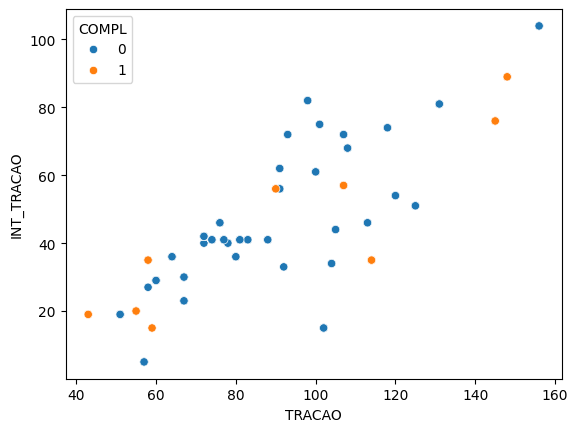

In [ ]:
sns.scatterplot(data = df,
               x = 'TRACAO',
               y = 'INT_TRACAO',
               hue = 'COMPL')

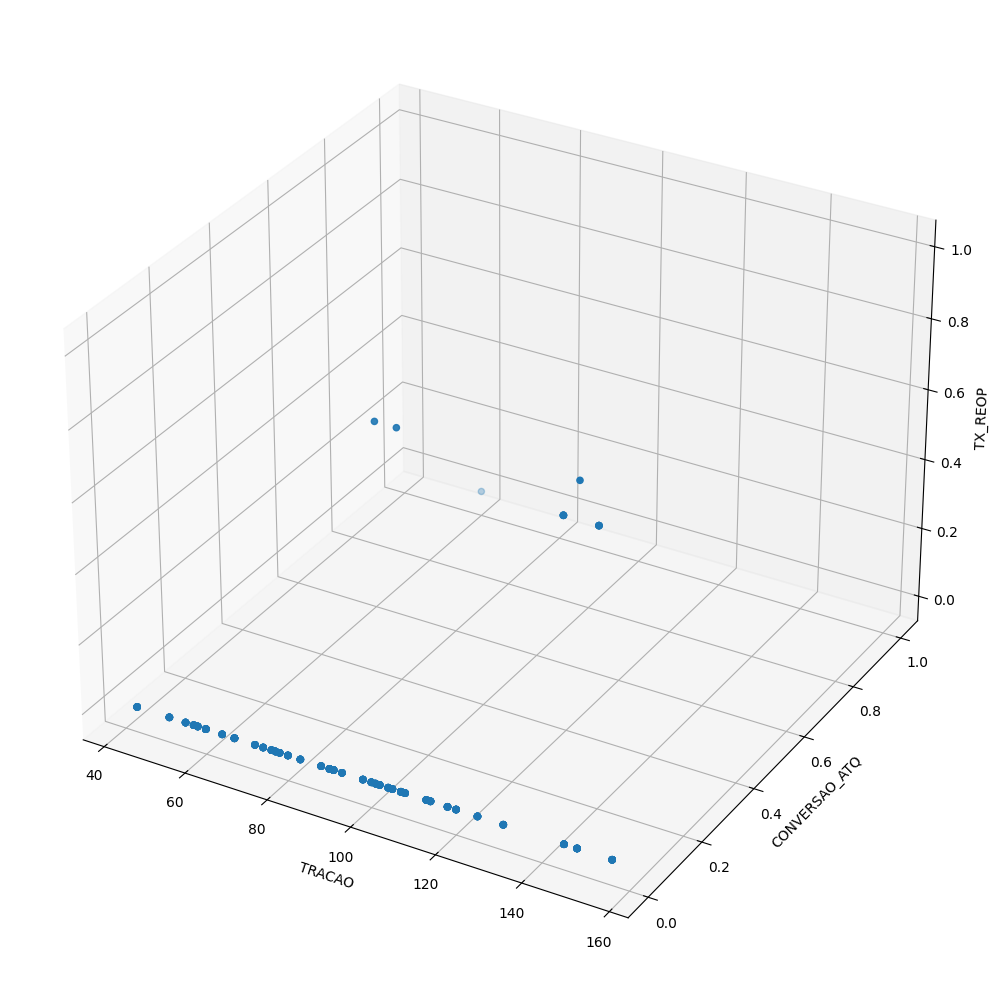

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Importing the necessary module for 3D plots

# Instead of df3d = px.data.df(), use your existing DataFrame:
fig = px.scatter_3d(df, x='TRACAO', y='CONVERSAO_ATQ', z='TX_REOP',
              color='COMPL', size='TRACAO', size_max=10) # Changed color to 'COMPL' as 'species' is not in your DataFrame
fig.show()

x1 = 'TRACAO'
x2 = 'CONVERSAO_ATQ'
x3 = 'TX_REOP'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df.loc[:, x1], df.loc[:, x2], df.loc[:, x3])

# Defining axis names
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel(x3)
plt.tight_layout()
plt.show()

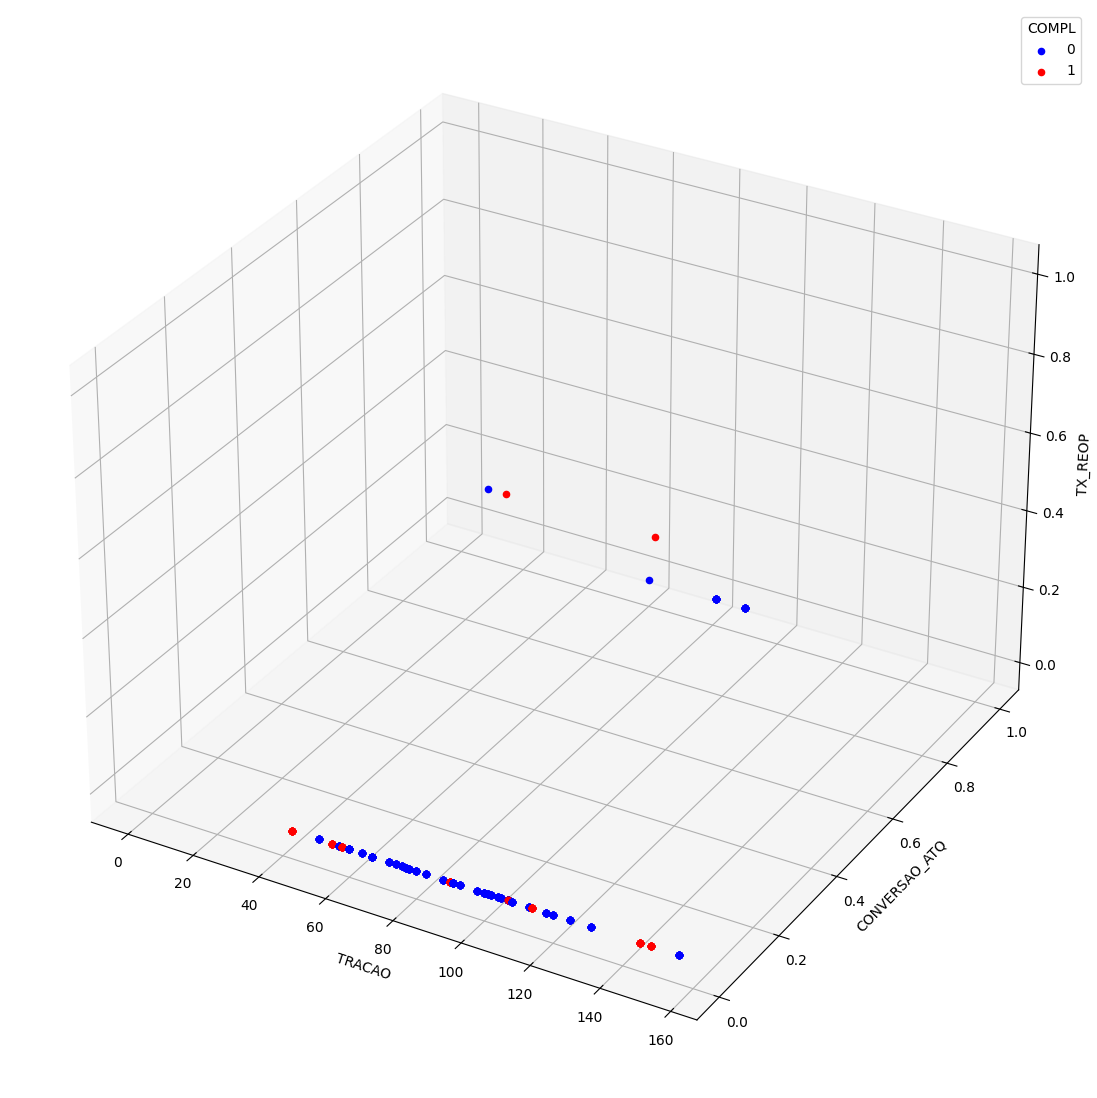

In [ ]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(projection = '3d')
colors = {'0': 'b', '1': 'r'}

for i in range(0,len(df)):
    # Assuming 'COMPL' is the column you want to use for color mapping
    # and it's in the 5th column (index 4)
    color_key = str(df.iloc[i,10]) # Convert color key to string

    # If color_key is not in colors, use a default color (e.g., black)
    color = colors.get(color_key, 'k')

    # Convert the data to numeric, handling potential errors
    try:
        x = float(df.iloc[i, 3])  # 'TRACAO'
        w = float(df.iloc[i, 12])  # 'CONVERSAO_ATQ'
        z = float(df.iloc[i, 14])  # 'TX_REOP'
    except ValueError:
        print(f"Skipping row {i} due to non-numeric data.")
        continue  # Skip this row and move to the next

    ax.scatter(x, w, z, c=color)

# Creating a legend
for COMPL, color in colors.items():
    ax.scatter([], [], [], c=color, label=COMPL)  # Empty point just for legend

ax.set_xlabel('TRACAO')
ax.set_ylabel('CONVERSAO_ATQ')
ax.set_zlabel('TX_REOP')
ax.legend(title="COMPL")  # Adding the legend title

plt.show()

# **PRE-PROCESSAMENTO E TREINAMENTO - REGRESSAO LOGISTICA**

In [ ]:
#Aplicação do modelo de machine learning e análise de resultados - Logistic Regression

#Separando dados de treino e teste
X = df.drop(columns = 'COMPL')
y = df['COMPL']

# divisão dos grupos em grupos de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

In [ ]:
#Preparação dos Dados e desenvolvimento do pipeline

# definindo features numéricas e o modelo de pré-processamento do pipeline
numerical_features = numerical_vars
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("log_transform", FunctionTransformer(np.log1p)),
        ("scaler", StandardScaler())
    ]
)

# definindo features categóricas e o modelo de pré-processamento do pipeline
from sklearn.feature_selection import chi2

categorical_features = categorical_vars
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=25)),
    ]
)

# Aplicando o pre-processamento definido previamente
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline([
    ("preprocessor", preprocessor),
    ('smote', SMOTE(random_state=42)),
    ("classifier", LogisticRegression(penalty='l2', C=0.1, solver='liblinear'))
])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['IDADE', 'TRACAO',
                                                   'RET_TRACAO', 'INT_TRACAO',
                                                   'PORTAIS', 'BLOQ_POS',
                                                   'CONVERSAO_ATQ', 'ANCORAS',
                                                   'TX_REOP']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=25,
                                                                                    score_func=<function chi2 at 0x7d5efaf563b0>))]),
                                                  ['SEXO', 'LADO', 'INDICACAO',
                                                   'IFA', 'TIPO'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(C=0.1, solver='liblinear'))])

In [ ]:
# aplicação do pipeline de pré-processamento para treinamento do modelo
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.989


In [ ]:
# Realizar a predição para o conjunto de treino e de teste
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Exibir as métricas para o conjunto de treino
print("Relatório de Classificação - Treinamento")
print(classification_report(y_train, y_pred_train))

# Exibir as métricas para o conjunto de teste
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_pred_test))

Relatório de Classificação - Treinamento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Relatório de Classificação - Teste
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       1.00      0.94      0.97        35

    accuracy                           0.99       176
   macro avg       0.99      0.97      0.98       176
weighted avg       0.99      0.99      0.99       176



In [ ]:
#Usando a validação cruzada, como k-fold cross-validation associado ao gridsearch para avaliar os melhores hiperparametros do modelo

param_grid = {'classifier__C': [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2]}

rskf = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=rskf, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

In [ ]:
#Treinando o melhor modelo em TODOS os dados de treino
best_clf.fit(X_train, y_train)

# Avaliação nos dados de TREINO
y_pred_train = best_clf.predict(X_train)
print("Relatório de Classificação - Treinamento:")
print(classification_report(y_train, y_pred_train))

# Avaliação nos dados de TESTE
y_pred_test = best_clf.predict(X_test)
print("\nRelatório de Classificação - Teste:")
print(classification_report(y_test, y_pred_test))

Relatório de Classificação - Treinamento:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       329
           1       0.88      1.00      0.94        80

    accuracy                           0.97       409
   macro avg       0.94      0.98      0.96       409
weighted avg       0.98      0.97      0.97       409


Relatório de Classificação - Teste:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       141
           1       0.92      0.97      0.94        35

    accuracy                           0.98       176
   macro avg       0.96      0.98      0.97       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
# Extração dos coeficientes das features

if hasattr(best_clf.named_steps['classifier'], 'coef_'):
    coef = best_clf.named_steps['classifier'].coef_[0]

    # Obter os nomes das features após o ColumnTransformer
    feature_names = []
    for name, transformer, columns in best_clf.named_steps['preprocessor'].transformers_:
        if name == 'num':
            # Aplicar as transformações numéricas (exceto o scaler) para obter os nomes corretos
            transformed_cols = pd.DataFrame(transformer[:-1].transform(X[numerical_features]), columns=numerical_features)
            feature_names.extend(transformed_cols.columns)
        elif name == 'cat':
            # Obter os nomes das features após o OneHotEncoder
            onehot_features = list(transformer.named_steps['encoder'].get_feature_names_out(categorical_features))
            selected_indices = transformer.named_steps['selector'].get_support(indices=True)
            feature_names.extend([onehot_features[i] for i in selected_indices])

    # Criar o DataFrame
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coef})
    feature_importance = feature_importance.sort_values('Importance')
    print("Importância das Features:")
    print(feature_importance)

else:
    print("O classificador não possui coeficientes.")

Importância das Features:
                     Feature  Importance
12                  TIPO_nan   -0.902694
6              CONVERSAO_ATQ   -0.176253
7                    ANCORAS   -0.056841
3                 INT_TRACAO   -0.044077
1                     TRACAO   -0.012015
4                    PORTAIS   -0.006388
8                    TX_REOP    0.068839
0                      IDADE    0.161590
10                 IFA_MISTO    0.213071
9   INDICACAO_LABRAL-CONDRAL    0.237166
5                   BLOQ_POS    0.280394
2                 RET_TRACAO    0.294111
11       TIPO_DOR MIOFASCIAL    0.695321


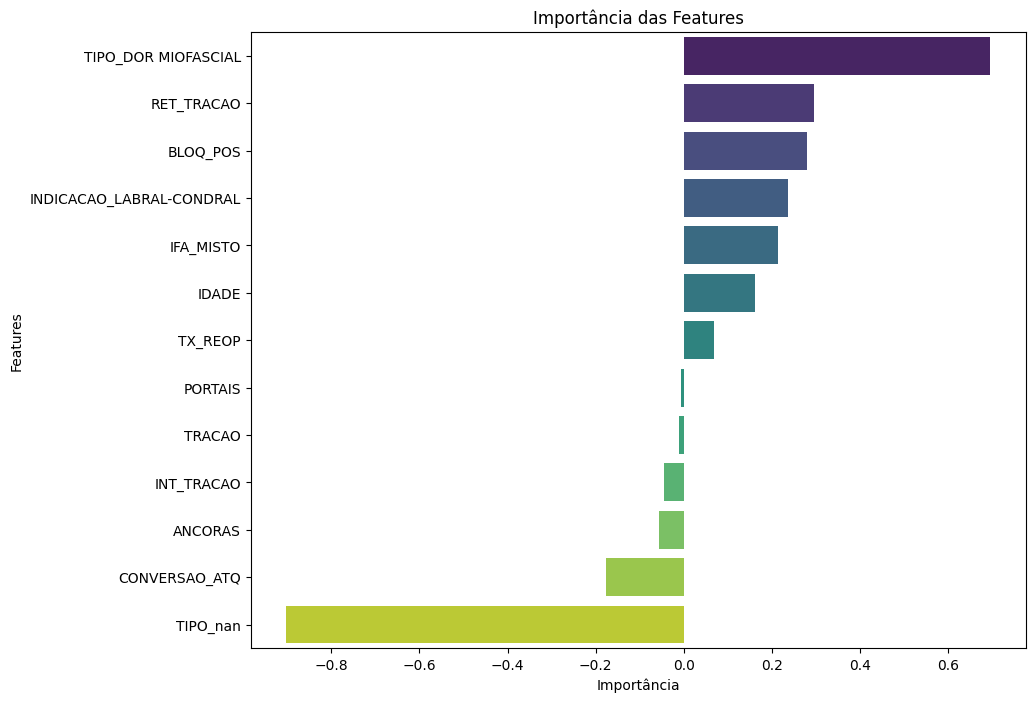

In [ ]:
# Plotando a importância das features

feature_importance_sorted = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_sorted, palette="viridis")
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()

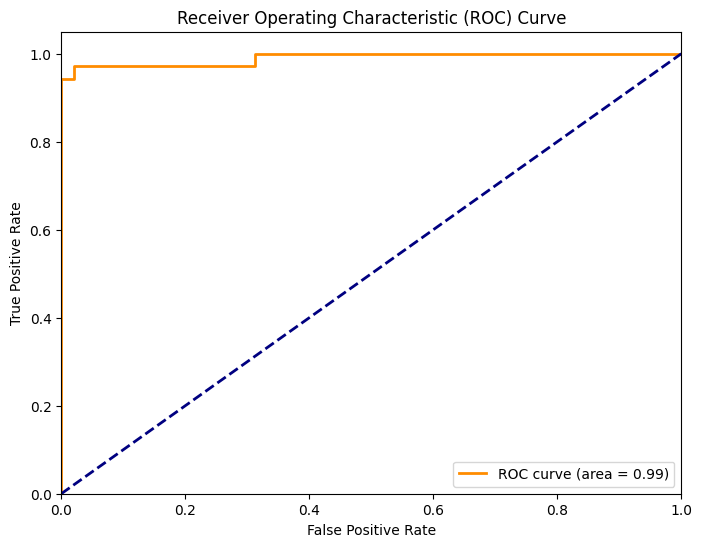

In [ ]:
#Considerando o modelo treinado em Regressao Logistica otimizado após definição do pipeline, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs = best_clf.predict_proba(X_test)[:, 1]

#Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

#Calculando AUC
roc_auc = auc(fpr, tpr)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets = {}

test_sets['Logistic Regression'] = {'X': X_test, 'y': y_test}

# **PRE-PROCESSAMENTO E TREINAMENTO - ARVORE DE DECISAO**

In [ ]:
# realizando um novo modelo de aprendizado utilizando a sistemática de Árvore de Decisão

#Separando dados de treino e teste
X2 = df.drop(columns = 'COMPL')
y2 = df['COMPL']

# divisão dos grupos em grupos de teste e treino
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, stratify=y, test_size=0.3)

In [ ]:
# definindo features numéricas e o modelo de pré-processamento do pipeline
numerical_features2 = numerical_vars
numerical_transformer2 = Pipeline(
    steps=[
        ("imputer2", SimpleImputer(strategy="median")),
        ("scaler2", StandardScaler())
    ]
)

# definindo features categóricas e o modelo de pré-processamento do pipeline
categorical_features2 = categorical_vars
categorical_transformer2 = Pipeline(
    steps=[
        ("imputer22", SimpleImputer(strategy="most_frequent")),
        ("encoder2", TargetEncoder(handle_unknown="ignore")),
        ("imputer222", SimpleImputer(strategy='most_frequent')), # Imputer incluso novamente para resolver os NaNs antes do SelectPercentile
        ("selector2", SelectPercentile(chi2, percentile=50)),
    ]
)

# Aplicando os transformadores definidos previamente
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num2", numerical_transformer2, numerical_features2),
        ("cat2", categorical_transformer2, categorical_features2),
    ]
)

dtc2 = Pipeline(
    steps=[
        ("preprocessor2", preprocessor2),
        ("smote2", SMOTE(random_state=42)),
        ("classifier2", DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ]
)
dtc2

Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(transformers=[('num2',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler2',
                                                                   StandardScaler())]),
                                                  ['IDADE', 'TRACAO',
                                                   'RET_TRACAO', 'INT_TRACAO',
                                                   'PORTAIS', 'BLOQ_POS',
                                                   'CONVERSAO_ATQ', 'ANCORAS',
                                                   'TX_REOP']),
                                                 ('cat2',
                                                  Pipeline(steps=[('imputer22',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('e...er2',
                                                                   TargetEncoder(handle_unknown='ignore')),
                                                                  ('imputer222',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('selector2',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x7d5efaf563b0>))]),
                                                  ['SEXO', 'LADO', 'INDICACAO',
                                                   'IFA', 'TIPO'])])),
                ('smote2', SMOTE(random_state=42)),
                ('classifier2',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# aplicação do pipeline de pré-processamento para treinamento do novo modelo
dtc2.fit(X_train2, y_train2)
print("model score: %.3f" % dtc2.score(X_test2, y_test2))

model score: 0.983


In [ ]:
# Realizar a predição para o conjunto de treino e de teste
y_pred_train2 = dtc2.predict(X_train2)
y_pred_test2 = dtc2.predict(X_test2)

# Exibir as métricas para o conjunto de treino
print("Relatório de Classificação - Treinamento")
print(classification_report(y_train2, y_pred_train2))

# Exibir as métricas para o conjunto de teste
print("Relatório de Classificação - Teste")
print(classification_report(y_test2, y_pred_test2))

Relatório de Classificação - Treinamento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Relatório de Classificação - Teste
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
#Como mesmo com o CV Kfold não foi possível corrigir o overfit dos dados de treinamento, iremos testar o searchgrid pra avaiar a otimização do mesmo

param_grid2 = {
    'classifier2__max_depth': [4, 5],
    'classifier2__min_samples_split': [5, 10],
    'classifier2__min_samples_leaf': [2, 4],
    'classifier2__max_leaf_nodes': [None, 5]
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

grid_search2 = GridSearchCV(dtc2, param_grid2, cv=rskf, scoring='f1_macro')
grid_search2.fit(X_train2, y_train2)

best_dtc2 = grid_search2.best_estimator_

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search2.best_params_)

# Avaliando o melhor modelo
y_pred_test2 = best_dtc2.predict(X_test2)
print(classification_report(y_test2, y_pred_test2))

Melhores parâmetros encontrados: {'classifier2__max_depth': 5, 'classifier2__max_leaf_nodes': None, 'classifier2__min_samples_leaf': 4, 'classifier2__min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       141
           1       0.97      0.91      0.94        35

    accuracy                           0.98       176
   macro avg       0.97      0.95      0.96       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
#Retreinando o modelo com os melhores parametros obtidos pelo SearchGrid
best_dtc2 = grid_search2.best_estimator_

#Refitando o modelo dos dados de treino
best_dtc2.fit(X_train2, y_train2)

# Realizando as predições nos dados de treino e teste
y_pred_train_best2 = best_dtc2.predict(X_train2)
y_pred_test_best2 = best_dtc2.predict(X_test2)

#Avaliação dos modelos de treino e teste
print("\nRelatório de Classificação - Treinamento (Após Grid Search):")
print(classification_report(y_train2, y_pred_train_best2))
print("\nRelatório de Classificação - Teste (Após Grid Search):")
print(classification_report(y_test2, y_pred_test_best2))


Relatório de Classificação - Treinamento (Após Grid Search):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       329
           1       0.99      0.97      0.98        80

    accuracy                           0.99       409
   macro avg       0.99      0.99      0.99       409
weighted avg       0.99      0.99      0.99       409


Relatório de Classificação - Teste (Após Grid Search):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       141
           1       0.97      0.91      0.94        35

    accuracy                           0.98       176
   macro avg       0.97      0.95      0.96       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
# Extração da importância das features
importancias2 = best_dtc2.named_steps['classifier2'].feature_importances_

# Obter os nomes das features (corrigido para funcionar com pipelines, encoders e SelectPercentile)
feature_names2 = []
for name, transformer, columns in best_dtc2.named_steps['preprocessor2'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        if isinstance(transformer, Pipeline):
            try:
                selected_features = transformer.named_steps['selector'].get_support(indices=True)
                original_feature_names = transformer[:-1].get_feature_names_out(columns)
                feature_names2.extend([original_feature_names[i] for i in selected_features])
            except KeyError:
                feature_names2.extend(columns)
        else:
            feature_names2.extend(transformer.get_feature_names_out(columns))
    else:
        feature_names2.extend(columns)

# Criar um DataFrame para visualizar as importâncias
feature_names2 = feature_names2[:len(importancias2)]
df_importancias2 = pd.DataFrame({
    'feature': feature_names2,
    'importancia': importancias2
})

# Ordenar por importância
df_importancias2 = df_importancias2.sort_values('importancia', ascending=False)

print(df_importancias2)

#Feature 2 = RET_TRACAO / Feature 3 = IDADE

          feature  importancia
9            SEXO     0.391364
2      RET_TRACAO     0.347743
0           IDADE     0.119759
10           LADO     0.074619
6   CONVERSAO_ATQ     0.066514
1          TRACAO     0.000000
3      INT_TRACAO     0.000000
4         PORTAIS     0.000000
5        BLOQ_POS     0.000000
7         ANCORAS     0.000000
8         TX_REOP     0.000000


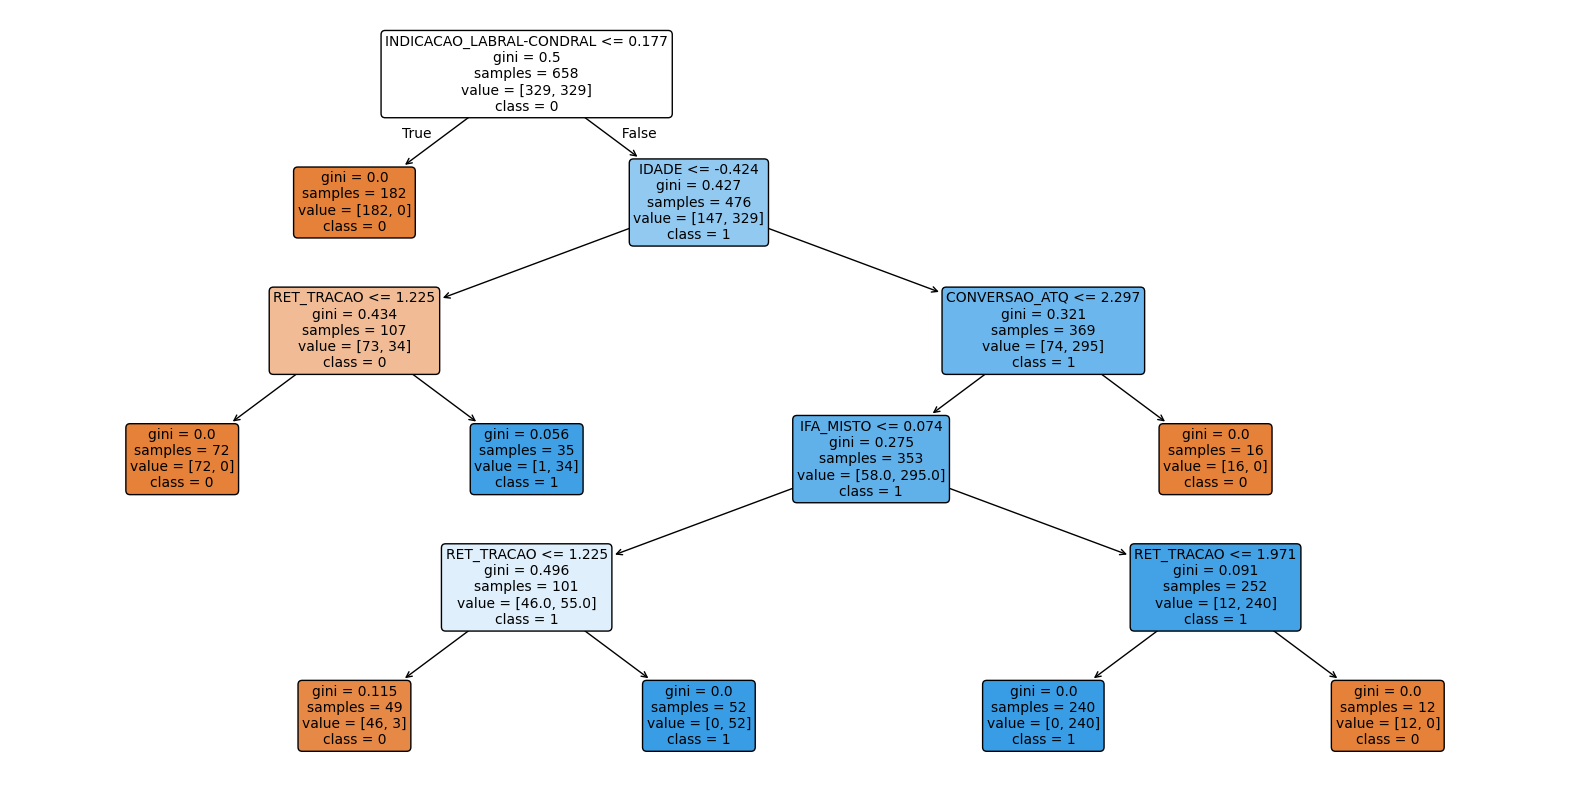

In [ ]:
#Vislizãndo a árvore de decisão treinada

plt.figure(figsize=(20, 10))
plot_tree(best_dtc2.named_steps['classifier2'],
          feature_names=feature_names,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

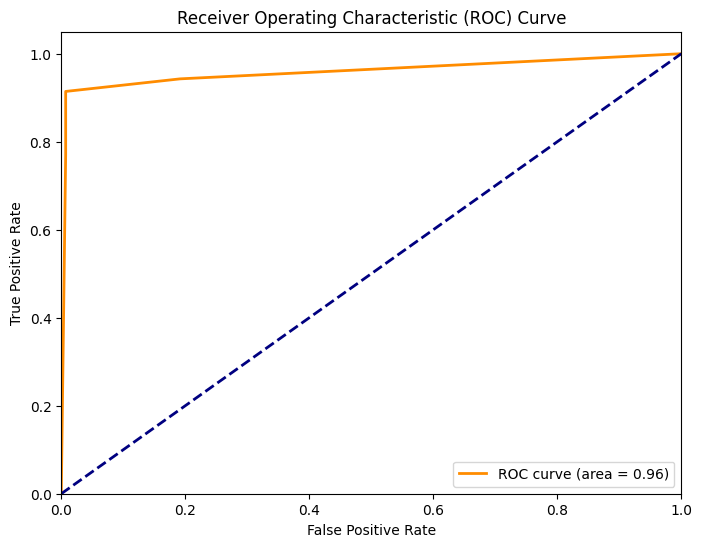

In [ ]:
#Considerando o modelo treinado em Arvore de Decisao após a otimização, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs2 = best_dtc2.predict_proba(X_test2)[:, 1]

#Calculando a curva ROC
fpr2, tpr2, thresholds = roc_curve(y_test2, y_probs2)

#Calculando AUC
roc_auc = auc(fpr2, tpr2)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['Decision Tree Classifier'] = {'X': X_test2, 'y': y_test2}

# **PRE-PROCESSAMENTO E TREINAMENTO - SUPORT VECTOR CLASSIFIER**

In [ ]:
#Preparação dos dados para o modelo de aprendizado utilizando SVC

#Seprando nova base de dados para o processamento
df_svc = df.copy()
X3 = df_svc.drop(columns='COMPL')
y3 = df_svc['COMPL']

#Imputando valores nos campos NULL nas features numéricas
X3num = X3[numerical_vars].copy()
imputer = SimpleImputer(strategy='mean')
X3num_imputed = pd.DataFrame(imputer.fit_transform(X3num), columns=numerical_vars)

print(X3num_imputed.isnull().sum())

IDADE            0
TRACAO           0
RET_TRACAO       0
INT_TRACAO       0
PORTAIS          0
BLOQ_POS         0
CONVERSAO_ATQ    0
ANCORAS          0
TX_REOP          0
dtype: int64


In [ ]:
#Imputando valores nos campos NULL nas features categoricas
X3cat = X3[categorical_vars].copy()
cat_imputer = SimpleImputer(strategy='most_frequent')
X3cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X3cat), columns=categorical_vars)

print(X3cat_imputed.isnull().sum())

SEXO         0
LADO         0
INDICACAO    0
IFA          0
TIPO         0
dtype: int64


In [ ]:
#Unificando os dois dataframes imputados num único para iniciar a modelagem
X3 = pd.concat([X3num_imputed, X3cat_imputed], axis=1)
X3.head()

IDADE  TRACAO  RET_TRACAO  INT_TRACAO  PORTAIS  BLOQ_POS  CONVERSAO_ATQ  \
0   45.0    67.0         5.0   23.000000      3.0       1.0       0.000000   
1   38.0    83.0         4.0   41.000000      3.0       0.0       0.000000   
2   30.0    60.0         2.0   48.626594      3.0       0.0       0.050086   
3   20.0    78.0         4.0   40.000000      3.0       0.0       0.000000   
4   58.0   104.0         4.0   34.000000      3.0       1.0       0.000000   

    ANCORAS   TX_REOP SEXO LADO INDICACAO     IFA            TIPO  
0  1.785455  0.005425    F    E    LABRAL   MISTO  DOR MIOFASCIAL  
1  1.785455  0.005425    M    E   CONDRAL  PINCER  DOR MIOFASCIAL  
2  1.785455  0.005425    F    D    LABRAL  PINCER  DOR MIOFASCIAL  
3  1.785455  0.005425    M    D    LABRAL  PINCER  DOR MIOFASCIAL  
4  1.785455  0.005425    M    D    LABRAL   MISTO  DOR MIOFASCIAL

In [ ]:
#Normalização dos dados para comparação dos modelos

# Separando variáveis numéricas e categóricas
X3num = X3.select_dtypes(include=['float64', 'int64'])
X3cat = X3.select_dtypes(exclude=['float64', 'int64'])

# Instanciando o escalador MinMax
scaler = MinMaxScaler()

# Aplicar o escalonamento nas variáveis numéricas
X3num_scaled = pd.DataFrame(scaler.fit_transform(X3num), columns=X3num.columns)

# Reunir as variáveis numéricas escalonadas e as categóricas
X3_normalized = pd.concat([X3num_scaled, X3cat.reset_index(drop=True)], axis=1)

# Conferir o resultado
X3_normalized.head()

IDADE    TRACAO  RET_TRACAO  INT_TRACAO  PORTAIS  BLOQ_POS  \
0  0.619048  0.212389         0.6    0.181818      0.5       1.0   
1  0.452381  0.353982         0.4    0.363636      0.5       0.0   
2  0.261905  0.150442         0.0    0.440673      0.5       0.0   
3  0.023810  0.309735         0.4    0.353535      0.5       0.0   
4  0.928571  0.539823         0.4    0.292929      0.5       1.0   

   CONVERSAO_ATQ   ANCORAS   TX_REOP SEXO LADO INDICACAO     IFA  \
0       0.000000  0.595152  0.005425    F    E    LABRAL   MISTO   
1       0.000000  0.595152  0.005425    M    E   CONDRAL  PINCER   
2       0.050086  0.595152  0.005425    F    D    LABRAL  PINCER   
3       0.000000  0.595152  0.005425    M    D    LABRAL  PINCER   
4       0.000000  0.595152  0.005425    M    D    LABRAL   MISTO   

             TIPO  
0  DOR MIOFASCIAL  
1  DOR MIOFASCIAL  
2  DOR MIOFASCIAL  
3  DOR MIOFASCIAL  
4  DOR MIOFASCIAL

In [ ]:
# Dividindo os dados em treino e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=42, stratify=y, test_size=0.3)

#Aplicação do modelo de machine learning e análise de resultados - SVC Linear
numerical_vars3 = X3_normalized.columns[X3_normalized.columns.isin(['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS',
                  'BLOQ_POS', 'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'])]
categorical_vars3 = X3_normalized.columns[X3_normalized.columns.isin(['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO'])]

# Criando um pipeline que aplica OneHotEncoder para variáveis categóricas e MinMaxScaler para numéricas
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num3', MinMaxScaler(), numerical_vars),
        ('cat3', OneHotEncoder(handle_unknown='ignore'), categorical_vars),
    ])

# Cria um pipeline que inclui o pré-processamento e o modelo
pipeline3 = Pipeline([
    ('preprocessor3', preprocessor3),
    ('classifier3', LinearSVC(loss='squared_hinge', class_weight='balanced', max_iter=10000)),
])

# Treina o modelo usando o pipeline
pipeline3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num3', MinMaxScaler(),
                                                  ['IDADE', 'TRACAO',
                                                   'RET_TRACAO', 'INT_TRACAO',
                                                   'PORTAIS', 'BLOQ_POS',
                                                   'CONVERSAO_ATQ', 'ANCORAS',
                                                   'TX_REOP']),
                                                 ('cat3',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SEXO', 'LADO', 'INDICACAO',
                                                   'IFA', 'TIPO'])])),
                ('classifier3',
                 LinearSVC(class_weight='balanced', max_iter=10000))])

In [ ]:
# Avaliação do modelo
y_pred_train3 = pipeline3.predict(X_train3)
print("\nClassification Report - Treinamento:\n", classification_report(y_train3, y_pred_train3))

y_pred3 = pipeline3.predict(X_test3)
print("Classification Report - Teste:\n", classification_report(y_test3, y_pred3))


Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       329
           1       0.80      0.96      0.88        80

    accuracy                           0.95       409
   macro avg       0.90      0.95      0.92       409
weighted avg       0.95      0.95      0.95       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       141
           1       0.73      0.91      0.81        35

    accuracy                           0.91       176
   macro avg       0.85      0.91      0.88       176
weighted avg       0.93      0.91      0.92       176



In [ ]:
#Otimização do modelo SVC Linear através do ajuste de hiperparâmetros

# Definição da grade de hiperparâmetros
param_grid3 = {
    'classifier3__C': [15, 20],
    'classifier3__max_iter': [1000, 2000],
    'classifier3__intercept_scaling': [0.1, 1],
    'classifier3__tol': [1e-4, 1e-5]
}

# GridSearchCV com validação cruzada
grid_search3 = GridSearchCV(
    pipeline3,
    param_grid=param_grid3,
    cv=20,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

# Ajusta o GridSearch ao conjunto de treino
grid_search3.fit(X_train3, y_train3)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search3.best_params_)

# Resultados no conjunto de Treino e Teste
y_pred_train_best3 = grid_search3.best_estimator_.predict(X_train3)
print("Classification Report - Treinamento:\n", classification_report(y_train3, y_pred_train_best3))

y_pred3 = grid_search3.best_estimator_.predict(X_test3)
print("Classification Report - Teste:\n", classification_report(y_test3, y_pred3))

Fitting 20 folds for each of 16 candidates, totalling 320 fits
Melhores parâmetros encontrados: {'classifier3__C': 20, 'classifier3__intercept_scaling': 0.1, 'classifier3__max_iter': 1000, 'classifier3__tol': 0.0001}
Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       329
           1       0.91      0.96      0.93        80

    accuracy                           0.97       409
   macro avg       0.95      0.97      0.96       409
weighted avg       0.97      0.97      0.97       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       141
           1       0.78      0.91      0.84        35

    accuracy                           0.93       176
   macro avg       0.88      0.93      0.90       176
weighted avg       0.94      0.93      0.93       176



In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['SVC Linear'] = {'X': X_test3, 'y': y_test3}

In [ ]:
# Divide os dados em treino e teste
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, random_state=42, stratify=y, test_size=0.3)

#Aplicação do modelo de machine learning e análise de resultados - SVC Não-linear

# Criando um pipeline que aplica OneHotEncoder para variáveis categóricas e MinMaxScaler para numéricas
preprocessor4 = ColumnTransformer(
    transformers=[
        ('num4', MinMaxScaler(), numerical_vars3),
        ('cat4', OneHotEncoder(handle_unknown='ignore'), categorical_vars3),
    ])

pipeline4 = Pipeline([
    ('preprocessor4', preprocessor4),
    ('classifier4', SVC(kernel='rbf', max_iter=4000, class_weight='balanced', probability=True)),
])

# Treina o modelo usando o pipeline
pipeline4.fit(X_train4, y_train4)

Pipeline(steps=[('preprocessor4',
                 ColumnTransformer(transformers=[('num4', MinMaxScaler(),
                                                  Index(['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS',
       'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'],
      dtype='object')),
                                                 ('cat4',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO'], dtype='object'))])),
                ('classifier4',
                 SVC(class_weight='balanced', max_iter=4000,
                     probability=True))])

In [ ]:
# Avaliação dos modelos de Treino e Teste - SVC Não-linear
y_pred_train4 = pipeline4.predict(X_train4)
print("\nClassification Report - Treinamento:\n", classification_report(y_train4, y_pred_train4))

y_pred4 = pipeline4.predict(X_test4)
print("Classification Report - Teste:\n", classification_report(y_test4, y_pred4))


Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       329
           1       0.95      1.00      0.98        80

    accuracy                           0.99       409
   macro avg       0.98      0.99      0.98       409
weighted avg       0.99      0.99      0.99       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
#Otimização do modelo SVC Não-linear através do ajuste de hiperparâmetros

param_grid4 = {
    'classifier4__C': [0.1, 1],
    'classifier4__max_iter': [1000, 2000],
    'classifier4__kernel': ['rbf', 'poly'],
    'classifier4__gamma': ['scale', 'auto'],
}

# GridSearchCV com validação cruzada
grid_search4 = GridSearchCV(
    pipeline4,
    param_grid=param_grid4,
    cv=10,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

# Ajusta o GridSearch ao conjunto de treino
grid_search4.fit(X_train4, y_train4)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search4.best_params_)

# Resultados nos conjuntos de Treino e Teste
y_pred_train4 = grid_search4.best_estimator_.predict(X_train4)
print("\nClassification Report - Treinamento:\n", classification_report(y_train4, y_pred_train4))

y_pred4 = grid_search4.best_estimator_.predict(X_test4)
print("Classification Report - Teste:\n", classification_report(y_test4, y_pred4))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Melhores parâmetros encontrados: {'classifier4__C': 1, 'classifier4__gamma': 'scale', 'classifier4__kernel': 'rbf', 'classifier4__max_iter': 1000}

Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       329
           1       0.95      1.00      0.98        80

    accuracy                           0.99       409
   macro avg       0.98      0.99      0.98       409
weighted avg       0.99      0.99      0.99       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



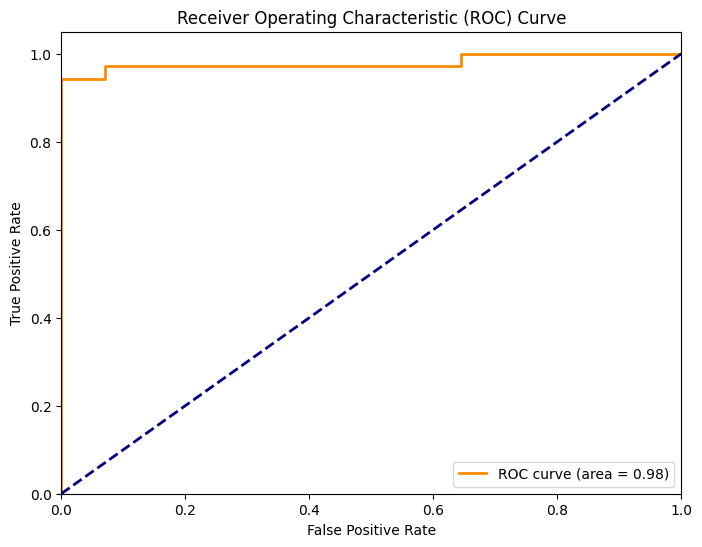

In [ ]:
#Considerando o modelo treinado SVC Não-linear após a otimização, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs4 = grid_search4.best_estimator_.predict_proba(X_test4)[:, 1]

#Calculando a curva ROC
fpr4, tpr4, thresholds = roc_curve(y_test4, y_probs4)

#Calculando AUC
roc_auc = auc(fpr4, tpr4)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['SVC Non-linear'] = {'X': X_test4, 'y': y_test4}

# **PRE-PROCESSAMENTO E TREINAMENTO - RANDOM FOREST CLASSIFIER**

In [ ]:
# realizando um novo modelo de aprendizado utilizando a sistemática Random Forest Classifier

#Separando dados de treino e teste
X5 = df.drop(columns = 'COMPL')
y5 = df['COMPL']

# Preparação dos dados para o modelo RFC
numerical_vars5 = X5.columns[X5.columns.isin(['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS', 'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'])]
categorical_vars5 = X5.columns[X5.columns.isin(['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO'])]

# divisão dos grupos em grupos de teste e treino
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=42, stratify=y, test_size=0.3)

In [ ]:
# definindo features numéricas e o modelo de pré-processamento do pipeline
numerical_features5 = numerical_vars5
numerical_transformer5 = Pipeline(
    steps=[
        ("imputer5", SimpleImputer(strategy="median")),
        ("scaler5", MinMaxScaler()),
    ]
)

# definindo features categóricas e o modelo de pré-processamento do pipeline
categorical_features5 = categorical_vars5
categorical_transformer5 = Pipeline(
    steps=[
        ("imputer55", SimpleImputer(strategy="most_frequent")),
        ('cat5', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ]
)

# Aplicando os transformadores definidos previamente
preprocessor5 = ColumnTransformer(
    transformers=[
        ("num5", numerical_transformer5, numerical_features5),
        ("cat5", categorical_transformer5, categorical_features5),
])

In [ ]:
# Criação do pipeline
rfc_pipeline = Pipeline([
    ('preprocessor5', preprocessor5),
    ('classifier5', RandomForestClassifier(random_state=42))
])

# Ajustando o modelo ao conjunto de treino
rfc_pipeline.fit(X_train5, y_train5)

# Fazendo previsões
y_pred5 = rfc_pipeline.predict(X_test5)

# Avaliando o desempenho do modelo nos dados de Teste e Treino
y_pred_train5 = rfc_pipeline.predict(X_train5)
print("\nClassification Report - Treinamento:\n", classification_report(y_train5, y_pred_train5))

y_pred5 = rfc_pipeline.predict(X_test5)
print("Classification Report - Teste:\n", classification_report(y_test5, y_pred5))


Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       1.00      0.94      0.97        35

    accuracy                           0.99       176
   macro avg       0.99      0.97      0.98       176
weighted avg       0.99      0.99      0.99       176



In [ ]:
# Ajustar Hiperparâmetros com GridSearchCV

# Definindo os parâmetros a serem ajustados
param_grid5 = {
    'classifier5__n_estimators': [100, 200],
    'classifier5__max_depth': [None, 10],
    'classifier5__min_samples_split': [5, 10],
    'classifier5__min_samples_leaf': [2, 4],
    'classifier5__max_features': ['sqrt', 'log2'],
    'classifier5__max_leaf_nodes': [None, 10]
}

# Configurando o GridSearch
grid_search5 = GridSearchCV(rfc_pipeline, param_grid5, cv=10, scoring='f1_macro', n_jobs=-1)

# Ajustando o modelo
grid_search5.fit(X_train5, y_train5)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search5.best_params_)

# Resultados nos conjuntos de Treino e Teste
y_pred_train5 = grid_search5.best_estimator_.predict(X_train5)
print("\nClassification Report - Treinamento:\n", classification_report(y_train5, y_pred_train5))

y_pred5 = grid_search5.best_estimator_.predict(X_test5)
print("Classification Report - Teste:\n", classification_report(y_test5, y_pred5))

Melhores parâmetros encontrados: {'classifier5__max_depth': None, 'classifier5__max_features': 'sqrt', 'classifier5__max_leaf_nodes': None, 'classifier5__min_samples_leaf': 2, 'classifier5__min_samples_split': 5, 'classifier5__n_estimators': 100}

Classification Report - Treinamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      0.99      0.99        80

    accuracy                           1.00       409
   macro avg       1.00      0.99      1.00       409
weighted avg       1.00      1.00      1.00       409

Classification Report - Teste:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       1.00      0.94      0.97        35

    accuracy                           0.99       176
   macro avg       0.99      0.97      0.98       176
weighted avg       0.99      0.99      0.99       176



                           feature  importancia
1                     num5__TRACAO     0.176060
3                 num5__INT_TRACAO     0.149730
2                 num5__RET_TRACAO     0.103338
0                      num5__IDADE     0.100055
15  cat5__INDICACAO_LABRAL-CONDRAL     0.087398
4                    num5__PORTAIS     0.078810
17                 cat5__IFA_MISTO     0.074321
7                    num5__ANCORAS     0.044958
18                cat5__IFA_PINCER     0.034803
14          cat5__INDICACAO_LABRAL     0.023845
6              num5__CONVERSAO_ATQ     0.023020
11                    cat5__LADO_D     0.020557
9                     cat5__SEXO_F     0.019741
10                    cat5__SEXO_M     0.017078
12                    cat5__LADO_E     0.015224
16                   cat5__IFA_CAM     0.012006
13         cat5__INDICACAO_CONDRAL     0.008676
5                   num5__BLOQ_POS     0.008535
19       cat5__TIPO_DOR MIOFASCIAL     0.001387
20                  cat5__TIPO_DSR     0

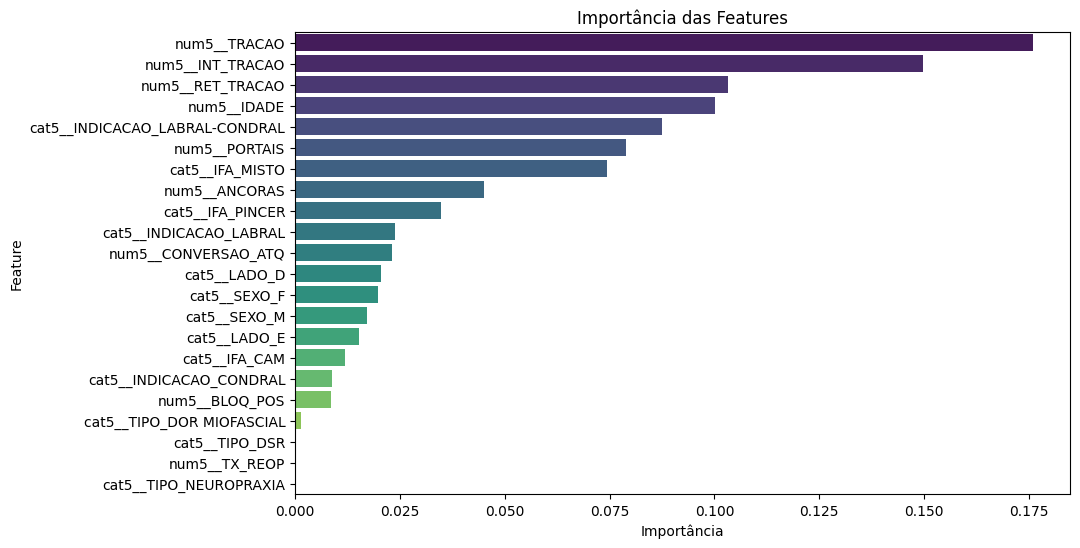

In [ ]:
# Extrair a importância das features
importancias_rfc = grid_search5.best_estimator_.named_steps['classifier5'].feature_importances_

# Obter os nomes das features após o pré-processamento
feature_names_rfc = grid_search5.best_estimator_.named_steps['preprocessor5'].get_feature_names_out()

# Criar um DataFrame para visualizar as importâncias
df_importancias_rfc = pd.DataFrame({'feature': feature_names_rfc, 'importancia': importancias_rfc})

# Ordenar por importância
df_importancias_rfc = df_importancias_rfc.sort_values('importancia', ascending=False)

# Imprimir o DataFrame
print(df_importancias_rfc)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=df_importancias_rfc, palette="viridis")
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

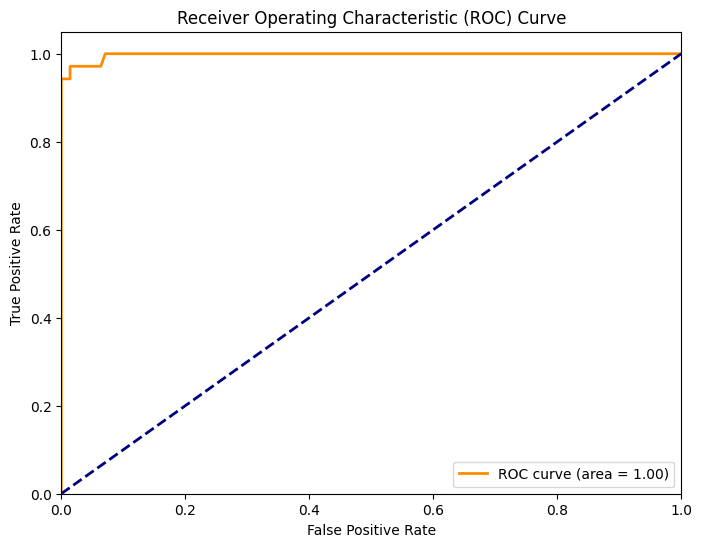

In [ ]:
#Considerando o modelo treinado RFC após a otimização, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs5 = grid_search5.best_estimator_.predict_proba(X_test5)[:, 1]

#Calculando a curva ROC
fpr5, tpr5, thresholds = roc_curve(y_test5, y_probs5)

#Calculando AUC
roc_auc = auc(fpr5, tpr5)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['RFC'] = {'X': X_test5, 'y': y_test5}

# **PRE-PROCESSAMENTO E TREINAMENTO - MLP Classifier**

In [ ]:
# Separando os dados para análise primária

X6 = df.drop("COMPL", axis=1)
y6 = df["COMPL"]

numerical_features6 = X6.select_dtypes(include=['number']).columns
categorical_features6 = X6.select_dtypes(include=['object']).columns

In [ ]:
# Criando os transformadores para colunas numéricas e categóricas
numeric_transformer6 = Pipeline(steps=[
    ('scaler6', StandardScaler())
])

categorical_transformer6 = Pipeline(steps=[
    ('onehot6', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar os transformadores usando ColumnTransformer
preprocessor6 = ColumnTransformer(
    transformers=[
        ('num6', numeric_transformer6, numerical_features6),
        ('cat6', categorical_transformer6, categorical_features6)
    ])

In [ ]:
#Dividisao dos dados em treino e teste:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.3, random_state=42, stratify=y)

#Criando e treinando o modelo MLP:

# Criando o pipeline com o pré-processador e o classificador MLP
pipeline6 = Pipeline([
    ('preprocessor6', preprocessor6),
    ('imputer6', SimpleImputer(strategy='median')),
    ('classifier6', MLPClassifier(
        hidden_layer_sizes=(100,),
        max_iter=1000,
        random_state=42))
])

pipeline6.fit(X_train6, y_train6)

Pipeline(steps=[('preprocessor6',
                 ColumnTransformer(transformers=[('num6',
                                                  Pipeline(steps=[('scaler6',
                                                                   StandardScaler())]),
                                                  Index(['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS',
       'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'],
      dtype='object')),
                                                 ('cat6',
                                                  Pipeline(steps=[('onehot6',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO'], dtype='object'))])),
                ('imputer6', SimpleImputer(strategy='median')),
                ('classifier6', MLPClassifier(max_iter=1000, random_state=42))])

In [ ]:
#Avaliando o modelo nos dados de TREINO
y_pred_train6 = pipeline6.predict(X_train6)
print("Avaliação nos dados de TREINO:")
print(classification_report(y_train6, y_pred_train6))

#Avaliando o modelo nos dados de TESTE
y_pred_test6 = pipeline6.predict(X_test6)
print("\nAvaliação nos dados de TESTE:")
print(classification_report(y_test6, y_pred_test6))

Avaliação nos dados de TREINO:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409


Avaliação nos dados de TESTE:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       1.00      0.94      0.97        35

    accuracy                           0.99       176
   macro avg       0.99      0.97      0.98       176
weighted avg       0.99      0.99      0.99       176



In [ ]:
#Diante do overfitting dos dados de treino, vamos buscar os melhores hiperparametros para evita-lo:

#Definindo a grade de hiperparâmetros a serem testados
param_grid6 = {
    'classifier6__hidden_layer_sizes': [(10,), (20,)],
    'classifier6__activation': ['relu', 'tanh'],
    'classifier6__solver': ['sgd'],
    'classifier6__alpha': [1.0, 10.0],
    'classifier6__learning_rate_init': [0.0001, 0.00001],
    'classifier6__max_iter': [1000, 2000],
    'classifier6__momentum': [0.5, 0.9],
}

# Criando o GridSearchCV
grid_search6 = GridSearchCV(pipeline6, param_grid6, cv=10, scoring='f1', n_jobs=-1, verbose=2)

#Treinando o modelo com GridSearchCV
grid_search6.fit(X_train6, y_train6)

print("Melhores hiperparâmetros:", grid_search6.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Melhores hiperparâmetros: {'classifier6__activation': 'relu', 'classifier6__alpha': 1.0, 'classifier6__hidden_layer_sizes': (20,), 'classifier6__learning_rate_init': 0.0001, 'classifier6__max_iter': 2000, 'classifier6__momentum': 0.9, 'classifier6__solver': 'sgd'}


In [ ]:
#Treinando o melhor modelo em TODOS os dados de treino
best_model6 = grid_search6.best_estimator_
best_model6.fit(X_train6, y_train6)

#Avaliando o melhor modelo nos dados de TREINO
y_pred_train6 = best_model6.predict(X_train6)
print("Avaliação nos dados de TREINO:")
print(classification_report(y_train6, y_pred_train6))

# Avaliação nos dados de TESTE
y_pred_test6 = best_model6.predict(X_test6)
print("\nAvaliação nos dados de TESTE:")
print(classification_report(y_test6, y_pred_test6))

Avaliação nos dados de TREINO:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       329
           1       1.00      0.88      0.93        80

    accuracy                           0.98       409
   macro avg       0.99      0.94      0.96       409
weighted avg       0.98      0.98      0.97       409


Avaliação nos dados de TESTE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       141
           1       1.00      0.80      0.89        35

    accuracy                           0.96       176
   macro avg       0.98      0.90      0.93       176
weighted avg       0.96      0.96      0.96       176



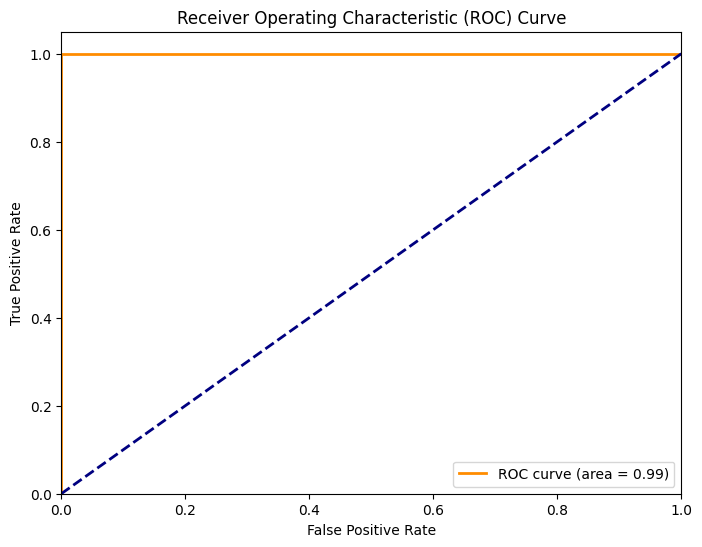

In [ ]:
#Considerando o modelo treinado MLP Classifier após a otimização, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs6 = grid_search6.best_estimator_.predict_proba(X_test6)[:, 1]

#Calculando a curva ROC
fpr6, tpr6, thresholds = roc_curve(y_test6, y_probs6)

#Calculando AUC
roc_auc = auc(fpr6, tpr6)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['MLP Classifier'] = {'X': X_test6, 'y': y_test6}

# **PRE-PROCESSAMENTO E TREINAMENTO - REDES NEURAIS**

In [ ]:
# Criando o modelo de treinamento de "Redes Neurais"

# Separando os dados para análise primária
X7 = df.drop("COMPL", axis=1)
y7 = df["COMPL"]

numerical_features7 = X7.select_dtypes(include=['number']).columns
categorical_features7 = X7.select_dtypes(include=['object']).columns

In [ ]:
#Dividisao dos dados em treino e teste:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.3, random_state=42, stratify=y)

# Preparação dos dados para treinamento - Imputer e Encoder
num_imputer7 = SimpleImputer(strategy='median')
cat_imputer7 = SimpleImputer(strategy='most_frequent')

X_train7[numerical_features7] = num_imputer7.fit_transform(X_train7[numerical_features7])
X_train7[categorical_features7] = cat_imputer7.fit_transform(X_train7[categorical_features7])

X_test7[numerical_features7] = num_imputer7.transform(X_test7[numerical_features7])
X_test7[categorical_features7] = cat_imputer7.transform(X_test7[categorical_features7])

preprocessor7 = ColumnTransformer(
    transformers=[
        ('num7', MinMaxScaler(), numerical_features7),
        ('cat7', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features7),
    ]
)

In [ ]:
# Função para criar o modelo de rede neural
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrapping o modelo para uso no pipeline
nn_model = KerasClassifier(
    model=lambda: create_model(input_shape=preprocessor7.fit_transform(X_train7).shape[1:]),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Criando o pipeline
pipeline7 = Pipeline(steps=[
    ('preprocessor7', preprocessor7),
    ('nn', nn_model)
])

In [ ]:
# Treinando o modelo de NN
pipeline7.fit(X_train7, y_train7)

#Avaliando o modelo nos dados de TREINO
y_pred_train7 = pipeline7.predict(X_train7)
print("Avaliação nos dados de TREINO:")
print(classification_report(y_train7, y_pred_train7))

#Avaliando o modelo nos dados de TESTE
y_pred_test7 = pipeline7.predict(X_test7)
print("\nAvaliação nos dados de TESTE:")
print(classification_report(y_test7, y_pred_test7))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7048 - loss: 0.6145
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4844  
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4575 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4239 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.3993  
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.3697 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.3027 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3011 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8859 - loss: 0.2542 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.2575 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.2326 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
# Avaliando a acurácia do modelo no grupo de TESTE
accuracy7 = pipeline7.score(X_test7, y_test7)
print(f"Acurácia do modelo no grupo de TESTE: {accuracy7:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do modelo no grupo de TESTE: 0.99


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


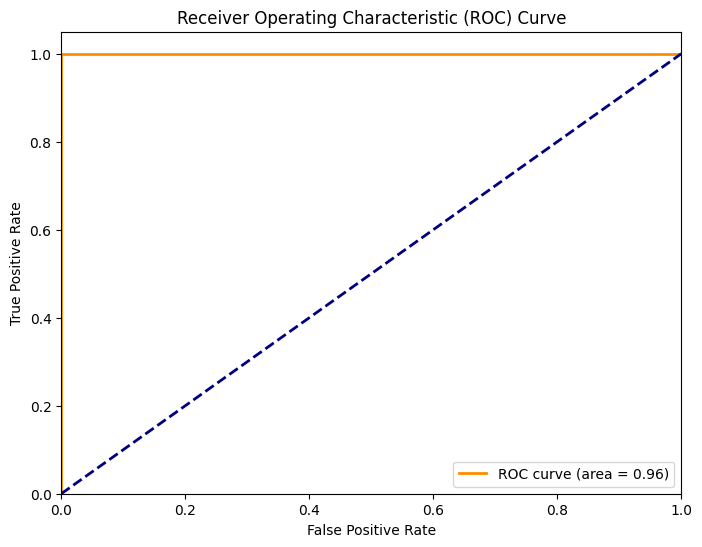

In [ ]:
#Considerando o modelo treinado de Redes Neurais, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs7 = pipeline7.predict_proba(X_test7)[:, 1]

#Calculando a curva ROC
fpr7, tpr7, thresholds = roc_curve(y_test7, y_probs7)

#Calculando AUC
roc_auc = auc(fpr7, tpr7)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['Redes Neurais'] = {'X': X_test7, 'y': y_test7}

# **PRE-ROCESSAMENTO E TREINAMENTO - XGBoost (EXTREME GRADIENT BOOSTING)**

In [ ]:
# Criando o modelo de treinamento XGBoosting

# Separando os dados para análise primária
X8 = df.drop("COMPL", axis=1)
y8 = df["COMPL"]

numerical_features8 = X.select_dtypes(include=['number']).columns
categorical_features8 = X.select_dtypes(include=['object']).columns

In [ ]:
#Dividisao dos dados em treino e teste:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.3, random_state=42, stratify=y)

#Pre-processamento dos dados com imputer e encoder
num_imputer8 = SimpleImputer(strategy='median')
cat_imputer8 = SimpleImputer(strategy='most_frequent')

X_train8[numerical_features8] = num_imputer8.fit_transform(X_train8[numerical_features8])
X_train8[categorical_features8] = cat_imputer8.fit_transform(X_train8[categorical_features8])

X_test8[numerical_features8] = num_imputer8.transform(X_test8[numerical_features8])
X_test8[categorical_features8] = cat_imputer8.transform(X_test8[categorical_features8])

preprocessor8 = ColumnTransformer(
    transformers=[
        ('num8', MinMaxScaler(), numerical_features8),
        ('cat8', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features8),
    ]
)

In [ ]:
#Criando o pipeline com XGBoosting
pipeline8 = Pipeline(steps=[
    ('preprocessor8', preprocessor8),
    ('xgb', XGBClassifier(random_state=42))
])

In [ ]:
# Treinando o modelo com o XGBoosting
pipeline8.fit(X_train8, y_train8)

#Avaliando o modelo nos dados de TREINO
y_pred_train8 = pipeline8.predict(X_train8)
print("Avaliação nos dados de TREINO:")
print(classification_report(y_train8, y_pred_train8))

#Avaliando o modelo nos dados de TESTE
y_pred_test8 = pipeline8.predict(X_test8)
print("\nAvaliação nos dados de TESTE:")
print(classification_report(y_test8, y_pred_test8))

Avaliação nos dados de TREINO:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409


Avaliação nos dados de TESTE:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
#Otimizando hiperparâmetros através do GridSearch para evitar o overfitting

# Definir a grade de hiperparâmetros
param_grid8 = {
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__n_estimators': [50, 100],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 0.9],
    'xgb__colsample_bytree': [0.8, 0.9],
    'xgb__gamma': [0, 0.1]
}

# Criar o pipeline
pipeline8 = Pipeline([
    ('preprocessor8', preprocessor8),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Criar o GridSearchCV
grid_search8 = GridSearchCV(pipeline8, param_grid8, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Treinar o modelo
grid_search8.fit(X_train8, y_train8)

# Imprimir os melhores hiperparâmetros
print("Melhores hiperparâmetros:", grid_search8.best_params_)

# Avaliar o modelo com os melhores hiperparâmetros
xgb_best = grid_search8.best_estimator_
y_pred_test8 = xgb_best.predict(X_test8)
print("\nAvaliação nos dados de TESTE (após GridSearchCV):")
print(classification_report(y_test8, y_pred_test8))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Melhores hiperparâmetros: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}

Avaliação nos dados de TESTE (após GridSearchCV):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



In [ ]:
#Reavaliando o modelo nos dados de TREINO
y_pred_train8 = xgb_best.predict(X_train8)
print("Revaliação nos dados de TREINO:")
print(classification_report(y_train8, y_pred_train8))

#Reavaliando o modelo nos dados de TESTE
y_pred_test8 = xgb_best.predict(X_test8)
print("\nRevaliação nos dados de TESTE (após GridSearchCV):")
print(classification_report(y_test8, y_pred_test8))

Revaliação nos dados de TREINO:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        80

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409


Revaliação nos dados de TESTE (após GridSearchCV):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.94      0.96        35

    accuracy                           0.98       176
   macro avg       0.98      0.97      0.97       176
weighted avg       0.98      0.98      0.98       176



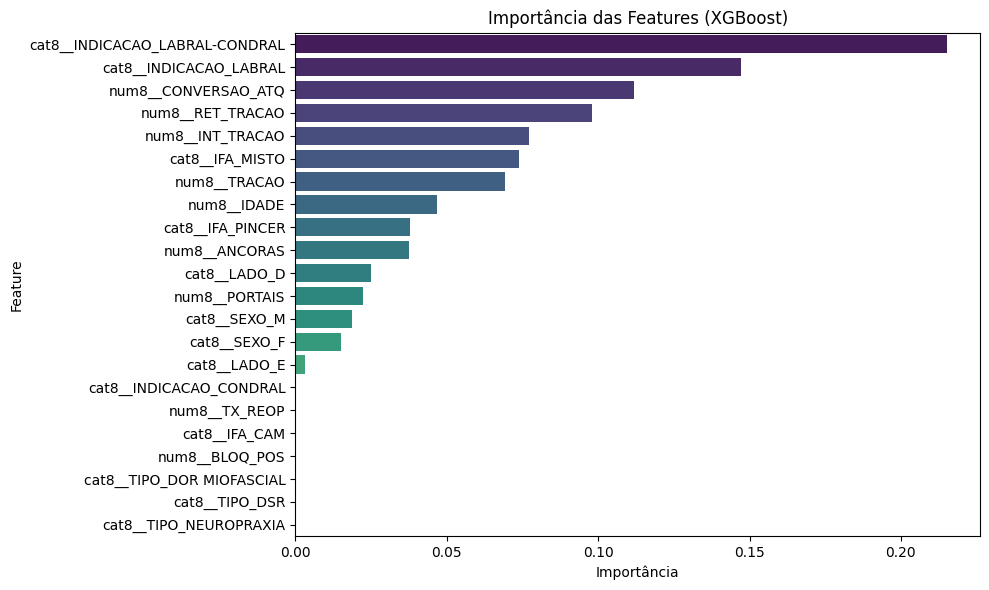

In [ ]:
#Obtendo as features importances do modelo treinado e otimizado

best_xgb = grid_search8.best_estimator_.named_steps['xgb']

# Obter a importância das features
importancias8 = best_xgb.feature_importances_

# Obter os nomes das features após o pré-processamento
feature_names8 = grid_search8.best_estimator_.named_steps['preprocessor8'].get_feature_names_out()

# Criar um DataFrame
df_importancias8 = pd.DataFrame({'feature': feature_names8, 'importancia': importancias8})

# Ordenar por importância
df_importancias8 = df_importancias8.sort_values('importancia', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=df_importancias8, palette="viridis")
plt.title('Importância das Features (XGBoost)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

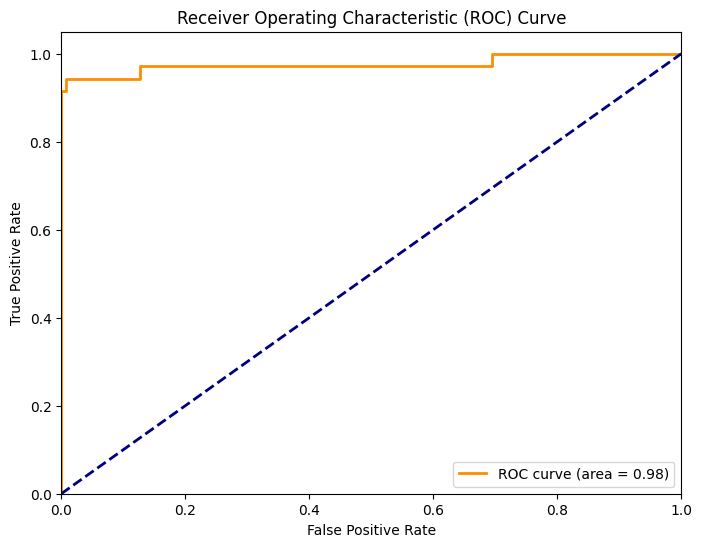

In [ ]:
#Considerando o modelo treinado de Redes Neurais, agora ploto a curva ROC do modelo.

#Coletando as probabilidades preditas para classe positiva
y_probs8 = grid_search8.predict_proba(X_test8)[:, 1]

#Calculando a curva ROC
fpr8, tpr8, thresholds = roc_curve(y_test8, y_probs8)

#Calculando AUC
roc_auc = auc(fpr8, tpr8)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr8, tpr8, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Armazenando o conjunto de testes aplicados ao modelo para posterior comparação
test_sets['XGB'] = {'X': X_test8, 'y': y_test8}

# ***ANÁLISE COMPARATIVA ENTRE OS DIFERENTES MODELOS TESTADOS***

In [ ]:
#Convocando todos os modelos treinados anteriormente

# Lista de modelos com nomes e estimadores
models_classes = [
    ('Logistic Regression', best_clf),
    ('Decision Tree Classifier', best_dtc2),
    ('SVC Linear', pipeline4),
    ('SVC Non-linear', grid_search4.best_estimator_),
    ('RFC', grid_search5.best_estimator_),
    ('MLP Classifier', best_model6),
    ('Redes Neurais', pipeline7),
    ('XGB', grid_search8.best_estimator_)
]

In [ ]:
print(f"Chaves de test_sets: {test_sets.keys()}")

Chaves de test_sets: dict_keys(['Logistic Regression', 'Decision Tree Classifier', 'SVC Linear', 'SVC Non-linear', 'RFC', 'MLP Classifier', 'Redes Neurais', 'XGB'])


In [ ]:
results = []

for name, model in models_classes:
    print(f"Avaliando modelo: {name}")
    try:
        X_test_model = test_sets[name]['X']
        y_test_model = test_sets[name]['y']

        y_pred_fin = model.predict(X_test_model)
        y_proba_fin = model.predict_proba(X_test_model)

        if hasattr(model, 'predict_proba'):
            y_proba_fin = model.predict_proba(X_test_model)
        else:
            y_proba_fin = None

        # Calcular as métricas
        accuracy = accuracy_score(y_test_model, y_pred_fin)
        precision = precision_score(y_test_model, y_pred_fin)
        recall = recall_score(y_test_model, y_pred_fin)
        f1 = f1_score(y_test_model, y_pred_fin)

        try:
            roc_auc = roc_auc_score(y_test_model, y_proba_fin[:, 1])
        except (AttributeError, ValueError):
            roc_auc = np.nan

        results.append([name, 'accuracy', accuracy, 0])
        results.append([name, 'precision', precision, 0])
        results.append([name, 'recall', recall, 0])
        results.append([name, 'f1', f1, 0])
        results.append([name, 'roc_auc', roc_auc, 0])

    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")
        for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
            results.append([name, metric, np.nan, np.nan])

results_df = pd.DataFrame(results, columns=['Model', 'Metrica', 'Valor', 'Std'])

Avaliando modelo: Logistic Regression
Avaliando modelo: Decision Tree Classifier
Avaliando modelo: SVC Linear
Avaliando modelo: SVC Non-linear
Avaliando modelo: RFC
Avaliando modelo: MLP Classifier
Avaliando modelo: Redes Neurais
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Avaliando modelo: XGB


                       Model    Metrica     Valor  Std
0        Logistic Regression   accuracy  0.977273    0
1        Logistic Regression  precision  0.918919    0
2        Logistic Regression     recall  0.971429    0
3        Logistic Regression         f1  0.944444    0
4        Logistic Regression    roc_auc  0.990476    0
5   Decision Tree Classifier   accuracy  0.977273    0
6   Decision Tree Classifier  precision  0.969697    0
7   Decision Tree Classifier     recall  0.914286    0
8   Decision Tree Classifier         f1  0.941176    0
9   Decision Tree Classifier    roc_auc  0.959372    0
10                SVC Linear   accuracy  0.982955    0
11                SVC Linear  precision  0.970588    0
12                SVC Linear     recall  0.942857    0
13                SVC Linear         f1  0.956522    0
14                SVC Linear    roc_auc  0.979534    0
15            SVC Non-linear   accuracy  0.982955    0
16            SVC Non-linear  precision  0.970588    0
17        

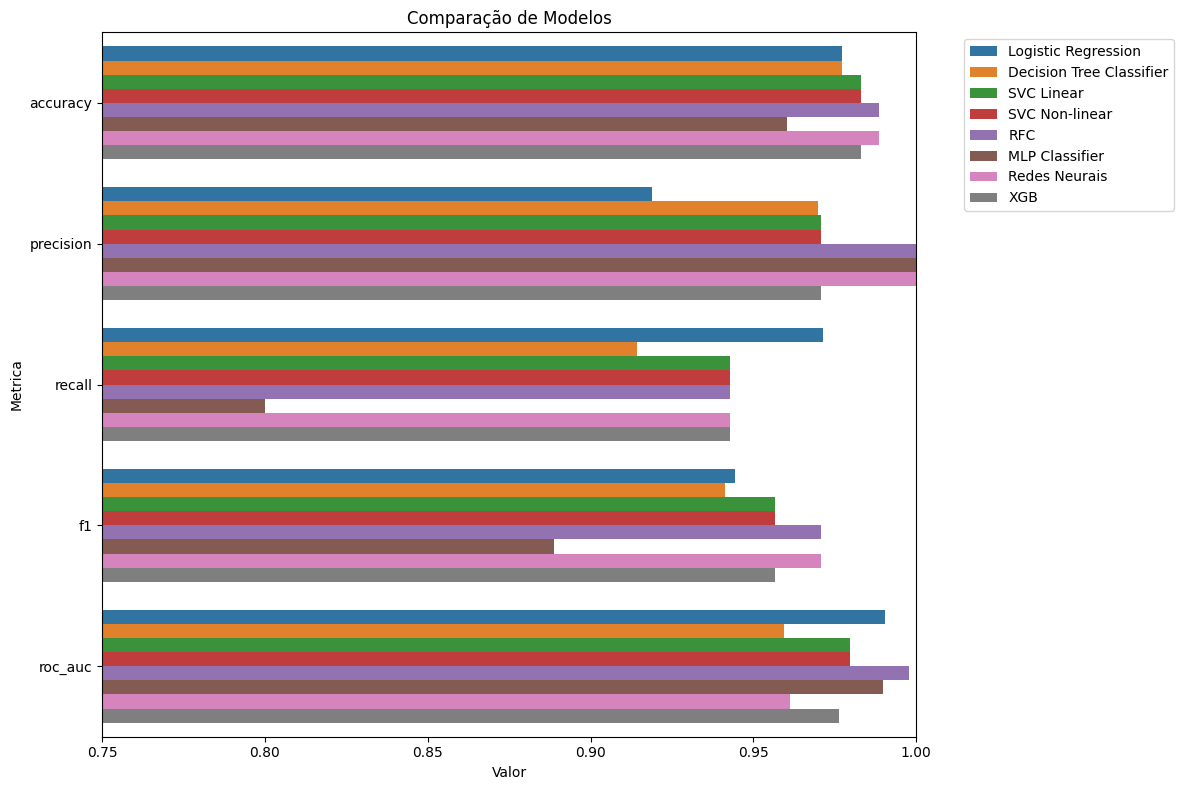

In [ ]:
# Imprimir os resultados
print(results_df)

# Visualizar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(y='Metrica', x='Valor', hue='Model', data=results_df, errorbar='sd', orient="h")
plt.title('Comparação de Modelos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim([0.75, 1.0])
plt.show()

___
**ANÁLISE PREDITIVA:**

- A análise preditiva realizada teve como objetivo principal a construção de um modelo capaz de prever a ocorrência de complicações pós-operatórias (COMPL) em pacientes submetidos à artroscopia de quadril.  Para tanto, foram avaliados os seguintes algoritmos de classificação: Regressão Logística, Árvore de Decisão, Support Vector Classifier (SVC) com kernel linear e não-linear, Random Forest Classifier (RFC), e Multi-layer Perceptron (MLP) Classifier, representando uma rede neural.  
- Cada modelo foi treinado e testado utilizando os dados pré-processados, que incluíram imputação de valores ausentes e escalonamento das features numéricas.  A performance dos modelos foi comparada com base nas métricas de acurácia, precisão, recall e F1-score.  Adicionalmente, a curva ROC e a métrica AUC foram utilizadas para avaliar a capacidade de discriminação dos modelos.
- Observou-se que modelos mais complexos, como RFC, MLP e XGBoost, apresentaram tendência ao overfitting, mesmo com a utilização de validação cruzada e otimização de hiperparâmetros via GridSearchCV.  
- A Regressão Logística e a Árvore de Decisão, por sua vez, demonstraram maior simplicidade e interpretabilidade, embora com desempenho preditivo ligeiramente inferior.
- Regressão Logística e Random Forest: Apresentaram as maiores acurácias (0.989). A Random Forest obteve precisão perfeita (1.00) nos dados de teste, sugerindo um ótimo desempenho na identificação dos casos positivos.  A Regressão Logística, por sua vez, teve um recall ligeiramente superior (0.971), indicando uma melhor capacidade de capturar os verdadeiros positivos.
- XGBoost, SVC Não-Linear e Redes Neurais:  Obtiveram acurácias próximas (0.98), com desempenho equilibrado em precisão e recall.
- Árvore de Decisão:  A acurácia foi um pouco menor (0.983), mas ainda assim, um bom resultado.
- SVC Linear: Apresentou o menor desempenho entre os modelos testados, com acurácia de 0.93 e F1-score de 0.84.
- MLP Classifier: Apesar da alta precisão (1.00), o recall foi menor (0.80), indicando que pode estar perdendo alguns casos positivos.
- O RFC, após otimização de hiperparâmetros, destacou-se como um dos melhores resultados em termos de métricas de avaliação, performando ligeiramente superior ao XGBoost.
___
**Avaliação crítica:**

Apesar da abrangência da análise, algumas melhorias poderiam ser implementadas para fortalecer as conclusões do estudo.

A inclusão da matriz de confusão na avaliação permitiria uma análise mais detalhada dos tipos de erros cometidos pelos modelos, especialmente considerando o potencial desbalanceamento das classes na variável alvo 'COMPL'.  

Técnicas de engenharia de atributos, como a combinação de categorias e criação de variáveis de interação, poderiam ser exploradas para aprimorar a capacidade preditiva dos modelos.  

Finalmente, a aplicação de métodos de seleção de atributos poderia simplificar os modelos e melhorar sua generalização, reduzindo o risco de overfitting.

# **ANALISANDO AS FEATURES DE MAIOR RELEVÂNCIA NO MELHOR MODELO PERFORMADO - RANDOM FOREST (OTIMIZADO)**

                           feature  importancia
1                     num5__TRACAO     0.176060
3                 num5__INT_TRACAO     0.149730
2                 num5__RET_TRACAO     0.103338
0                      num5__IDADE     0.100055
15  cat5__INDICACAO_LABRAL-CONDRAL     0.087398
4                    num5__PORTAIS     0.078810
17                 cat5__IFA_MISTO     0.074321
7                    num5__ANCORAS     0.044958
18                cat5__IFA_PINCER     0.034803
14          cat5__INDICACAO_LABRAL     0.023845
6              num5__CONVERSAO_ATQ     0.023020
11                    cat5__LADO_D     0.020557
9                     cat5__SEXO_F     0.019741
10                    cat5__SEXO_M     0.017078
12                    cat5__LADO_E     0.015224
16                   cat5__IFA_CAM     0.012006
13         cat5__INDICACAO_CONDRAL     0.008676
5                   num5__BLOQ_POS     0.008535
19       cat5__TIPO_DOR MIOFASCIAL     0.001387
20                  cat5__TIPO_DSR     0

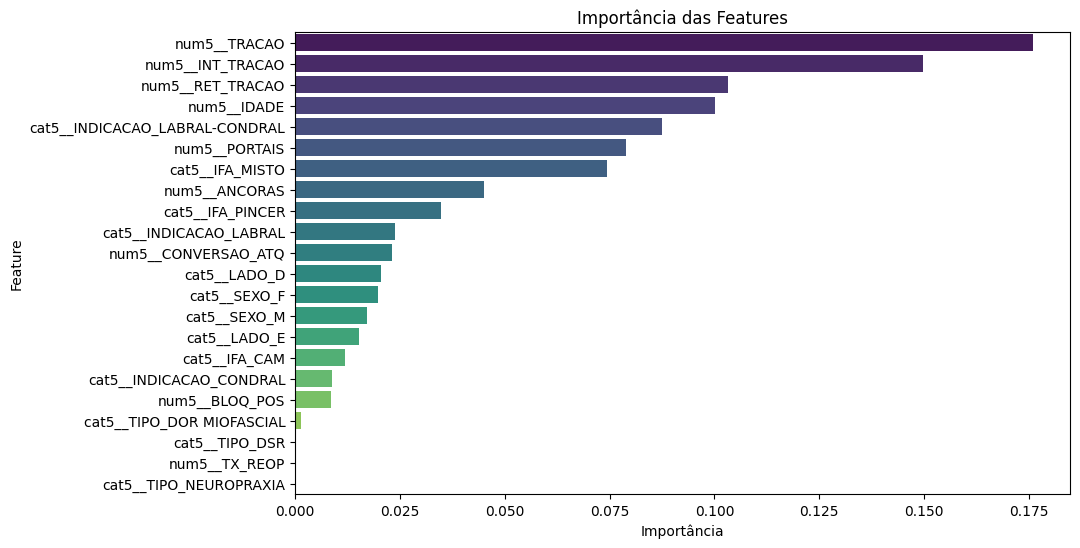

In [ ]:
# Extrair a importância das features
importancias_rfc = grid_search5.best_estimator_.named_steps['classifier5'].feature_importances_

# Obter os nomes das features após o pré-processamento
feature_names_rfc = grid_search5.best_estimator_.named_steps['preprocessor5'].get_feature_names_out()

# Criar um DataFrame para visualizar as importâncias
df_importancias_rfc = pd.DataFrame({'feature': feature_names_rfc, 'importancia': importancias_rfc})

# Ordenar por importância
df_importancias_rfc = df_importancias_rfc.sort_values('importancia', ascending=False)

# Imprimir o DataFrame
print(df_importancias_rfc)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=df_importancias_rfc, palette="viridis")
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Selecionando as 5 melhores features de acordo com o modelo treinado (excluindo-se o TIPO_nan)
top_5_features = df_importancias_rfc['feature'].iloc[1:6].tolist()
top_5_features

['num5__INT_TRACAO',
 'num5__RET_TRACAO',
 'num5__IDADE',
 'cat5__INDICACAO_LABRAL-CONDRAL',
 'num5__PORTAIS']

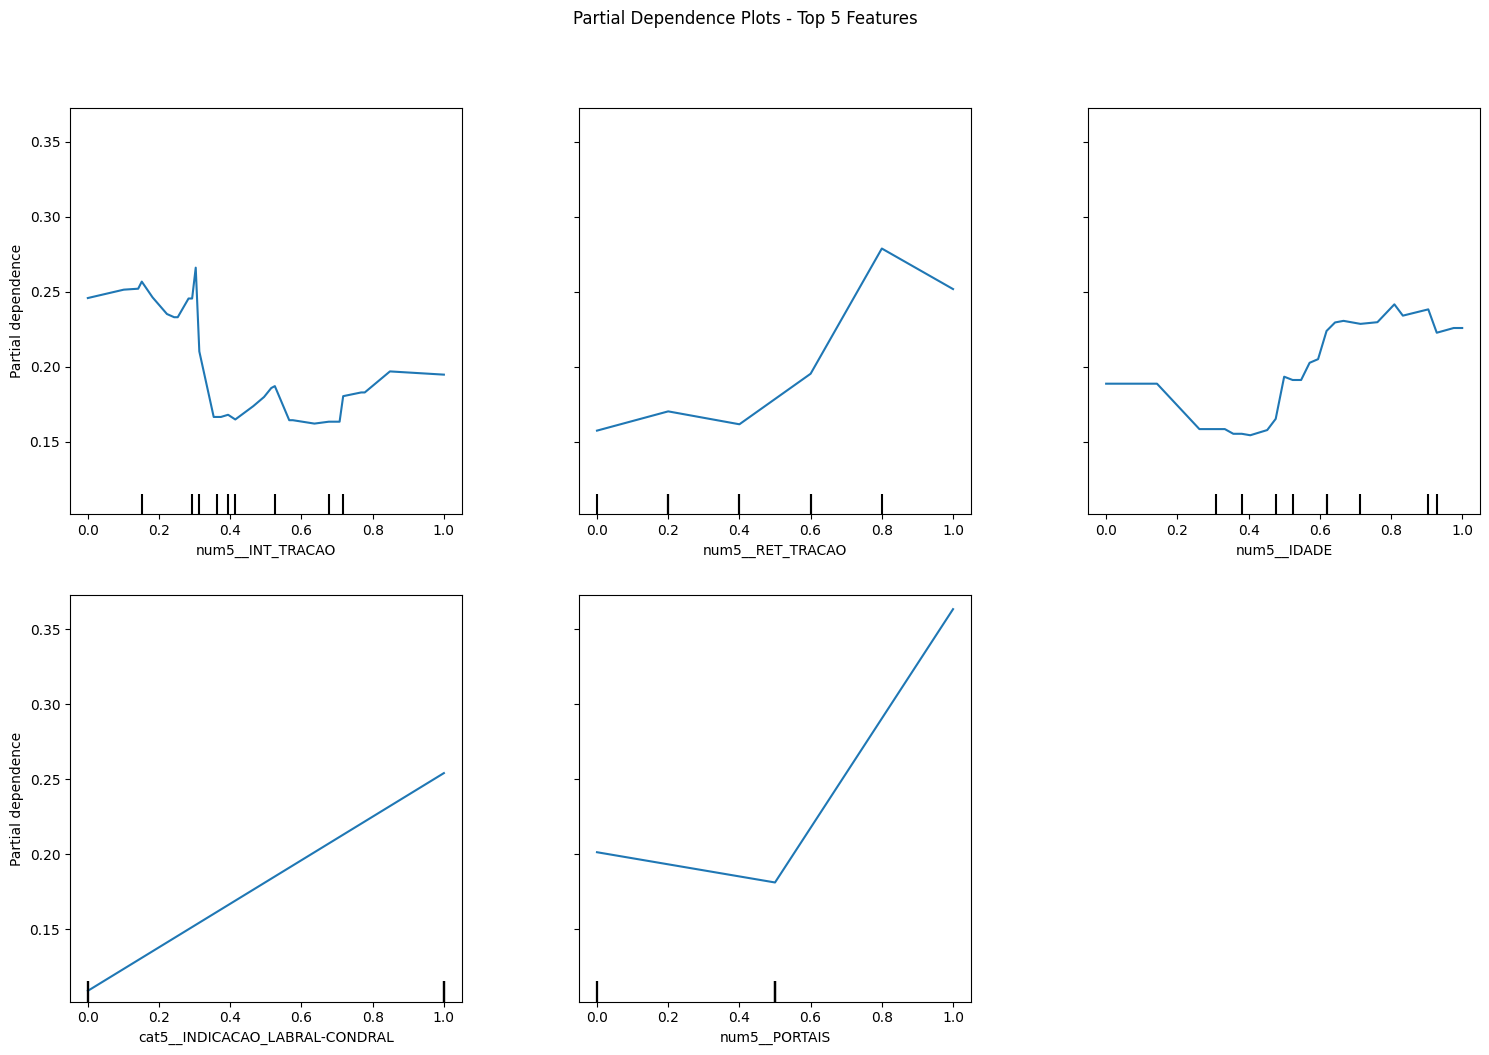

In [ ]:
#Realizando o Partial Dependence Display para avaliar as influências das 5 melhores features no aprendizado do modelo RFC

# Obter o preprocessor do pipeline
preprocessor5 = grid_search5.best_estimator_.named_steps['preprocessor5']

# Obter os nomes das features transformadas do pipeline TREINADO
feature_names_transformed = grid_search5.best_estimator_.named_steps['preprocessor5'].get_feature_names_out()

# Transformar X5
X5_transformed = preprocessor5.transform(X5)

# Converter X5_transformed para DataFrame com os nomes das features transformadas
X5_transformed = pd.DataFrame(X5_transformed, columns=feature_names_transformed)

# Criar a figura e os eixos com o tamanho desejado
fig, ax = plt.subplots(figsize=(15, 10))

# Gerar os PDPs com X5_transformed e os nomes transformados
pd_display = PartialDependenceDisplay.from_estimator(
    grid_search5.best_estimator_.named_steps['classifier5'], # Passar apenas o classificador
    X5_transformed,  # Usar X5 transformado
    top_5_features, # Usar os nomes transformados
    kind='average',
    grid_resolution=100,
    n_cols=3,
    ax=ax
)

plt.suptitle('Partial Dependence Plots - Top 5 Features', y=1.05)
plt.tight_layout()
pd_display.figure_.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()

**CONCLUSÃO - ANÁLISE REALIZADA:**


Pontos Positivos:


- Variedade de Modelos: O notebook explora uma gama diversificada de modelos de classificação, desde os mais simples (Regressão Logística) até os mais complexos (Redes Neurais e XGBoost).  Isso permite comparar o desempenho e escolher o modelo mais adequado.

- Pré-processamento: O notebook inclui etapas importantes de pré-processamento, como imputação de valores ausentes e escalonamento de variáveis numéricas.  Essas etapas são cruciais para o bom funcionamento dos modelos.

- Validação Cruzada: A utilização de validação cruzada (principalmente com GridSearchCV) ajuda a evitar overfitting e a selecionar os melhores hiperparâmetros para cada modelo.

- Métricas de Avaliação: O uso de métricas como precisão, recall e F1-score permite avaliar o desempenho dos modelos de forma quantitativa.

- ROC Curve: A inclusão da curva ROC para alguns modelos ajuda a visualizar o trade-off entre taxa de falsos positivos e taxa de verdadeiros positivos.


Pontos Negativos:


- Overfitting:  Apesar do uso de validação cruzada, alguns modelos ainda apresentam leve overfitting, como evidenciado pela diferença significativa entre as métricas de treino e teste (principalmente nos modelos mais complexos).  Técnicas adicionais de regularização ou seleção de atributos poderiam ser exploradas.

- Análise de Erros:  Não há uma análise dos erros cometidos pelos modelos.  Analisar os casos em que o modelo erra pode fornecer insights valiosos sobre as limitações do modelo e as características dos dados.

- Tratamento de Classes Desbalanceadas:  O notebook não discute explicitamente o possível desbalanceamento das classes na variável alvo 'COMPL'.  Técnicas como oversampling, undersampling ou ajuste de pesos de classe poderiam ser consideradas.

- Visualizações: As visualizações são básicas e poderiam ser aprimoradas para facilitar a compreensão dos dados.  Gráficos mais elaborados, como gráficos de dispersão com cores representando as classes, poderiam ser úteis.

**MELHOR OPÇÃO DE MODELO:**

O RFC aparenta ter um desempenho superior ao XGBoost em todas as métricas, performando melhor no cenário simulado, ainda que o XGBoost tenda a ser melhor quando consideramos as observações gerais de literatura. Algumas razões podem explicar a melhor performance do RFC:
- Ajuste de Hiperparâmetros: O XGBoost é muito sensível aos seus hiperparâmetros. Se os hiperparâmetros não forem otimizados corretamente para o conjunto de dados específico, seu desempenho pode ser inferior ao de um RFC com hiperparâmetros mais adequados, mesmo que sub-ótimos.  A busca por hiperparâmetros no XGBoost é mais complexa e exige mais recursos computacionais.
- Características do Conjunto de Dados:  Alguns conjuntos de dados são mais adequados para a abordagem de ensemble por bagging utilizada pelo RFC, enquanto outros se beneficiam mais do boosting utilizado pelo XGBoost.  Características como o número de amostras, o número de features, a presença de ruído e a separabilidade das classes podem influenciar qual algoritmo terá melhor performance.  
- Overfitting no XGBoost: Mesmo com validação cruzada, é possível que o XGBoost tenha sofrido overfitting nos dados de treinamento, especialmente se a busca por hiperparâmetros não for exaustiva ou se o conjunto de validação não for representativo dos dados de teste.  Isso levaria a um desempenho aparentemente bom no treinamento, mas inferior no teste, como parece ser o caso.
- Variabilidade Estatística:  Existe sempre uma componente de variabilidade estatística nos resultados de experimentos de aprendizado de máquina.  É possível que a diferença observada entre o RFC e o XGBoost seja devida apenas ao acaso, especialmente se a diferença for pequena. Repetir o experimento várias vezes com diferentes sementes aleatórias e calcular intervalos de confiança para as métricas de avaliação ajudaria a determinar se a diferença é estatisticamente significativa.


**Em suma, o modelo RFC apresentou a melhor performance global mas é importante destacar a importância de se experimentar diferentes algoritmos e ajustar cuidadosamente seus hiperparâmetros para cada conjunto de dados. A escolha do melhor modelo deve ser sempre baseada em experimentos rigorosos e na análise das características específicas do problema.**

# **ANÁLISE DE SEGMENTAÇÃO - IDENTIFICANDO GRUPOS DE PADRÕES SEMELHANTES**

In [ ]:
# realizando um novo modelo de aprendizado utilizando a sistemática Random Forest Classifier

#Separando dados de treino e teste
X5 = df.drop(columns = 'COMPL')
y5 = df['COMPL']

# Preparação dos dados para o modelo RFC
numerical_vars5 = X5.columns[X5.columns.isin(['IDADE', 'TRACAO', 'RET_TRACAO', 'INT_TRACAO', 'PORTAIS', 'BLOQ_POS', 'CONVERSAO_ATQ', 'ANCORAS', 'TX_REOP'])]
categorical_vars5 = X5.columns[X5.columns.isin(['SEXO', 'LADO', 'INDICACAO', 'IFA', 'TIPO'])]

In [ ]:
# definindo features numéricas e o modelo de pré-processamento do pipeline
numerical_features5 = numerical_vars5
numerical_transformer5 = Pipeline(
    steps=[
        ("imputer5", SimpleImputer(strategy="median")),
        ("scaler5", MinMaxScaler()),
    ]
)

# definindo features categóricas e o modelo de pré-processamento do pipeline
categorical_features5 = categorical_vars5
categorical_transformer5 = Pipeline(
    steps=[
        ("imputer55", SimpleImputer(strategy="most_frequent")),
        ('cat5', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ]
)

# Aplicando os transformadores definidos previamente
preprocessor5 = ColumnTransformer(
    transformers=[
        ("num5", numerical_transformer5, numerical_features5),
        ("cat5", categorical_transformer5, categorical_features5),
])

# Aplicando pre-processamento
X5_pp = preprocessor5.fit_transform(X5)

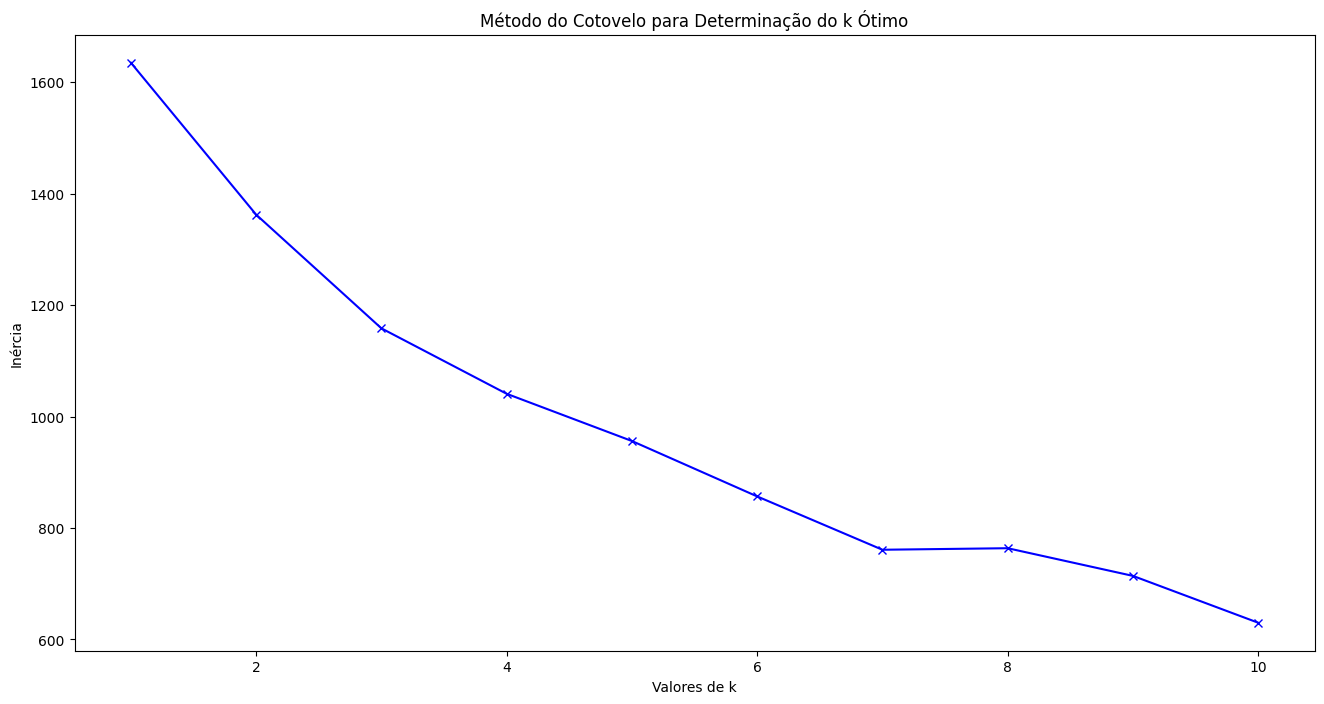

In [ ]:
# Determinando o número ótimo de clusters (k)

# Método do Cotovelo (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X5_pp)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Valores de k')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do k Ótimo')
plt.show()

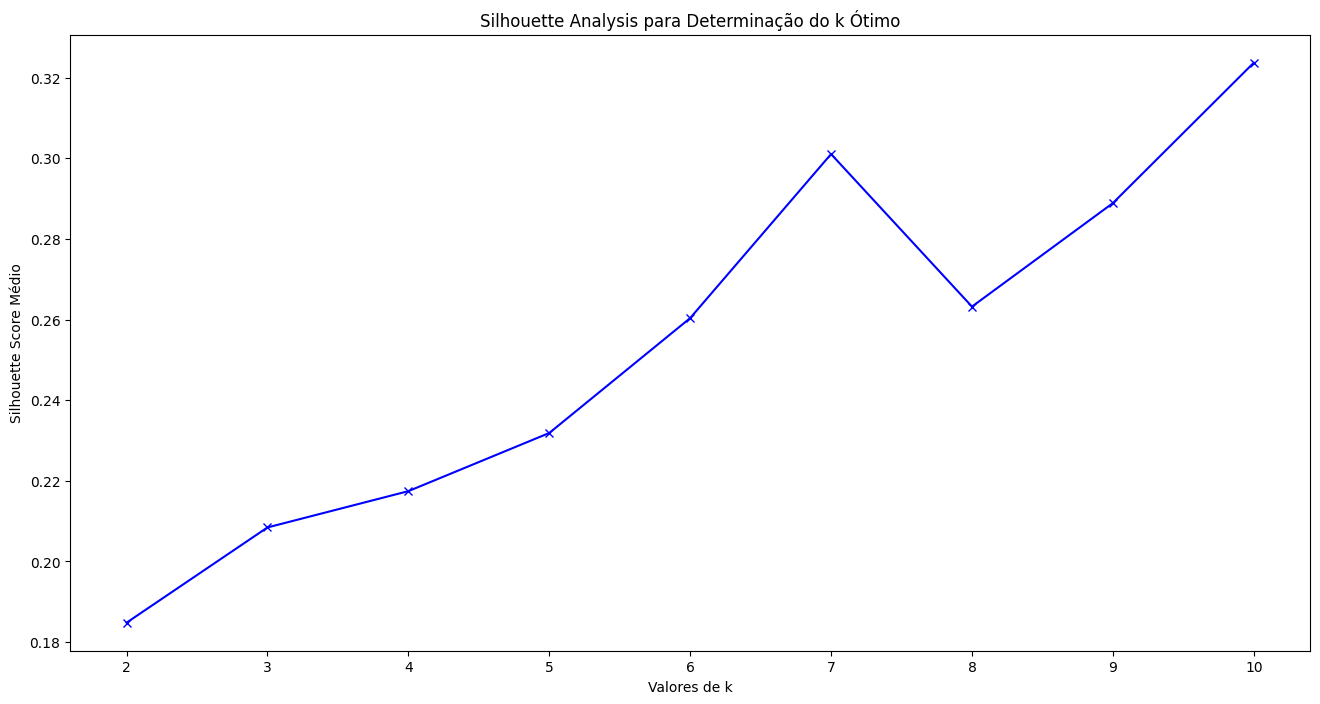

In [ ]:
# Silhouette Analysis
silhouette_avg = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X5_pp)
    silhouette_avg.append(silhouette_score(X5_pp, cluster_labels))

plt.figure(figsize=(16, 8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('Valores de k')
plt.ylabel('Silhouette Score Médio')
plt.title('Silhouette Analysis para Determinação do k Ótimo')
plt.show()

**Após as análises do número ótimo de clusters (k) pelo Método do Cotovelo e pelo Silhouette Score, fica definido que o k ideal é 7.**

In [ ]:
# Executar o K-Means com os dados pré-processados
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X5_pp)

# Adicionar os clusters ao dataframe original
X5['cluster'] = clusters

X5.head()

SEXO  IDADE LADO  TRACAO  RET_TRACAO  INT_TRACAO INDICACAO     IFA  PORTAIS  \
0    F   45.0    E      67           5        23.0    LABRAL   MISTO        3   
1    M   38.0    E      83           4        41.0   CONDRAL  PINCER        3   
2    F   30.0    D      60           2         NaN    LABRAL  PINCER        3   
3    M   20.0    D      78           4        40.0    LABRAL  PINCER        3   
4    M   58.0    D     104           4        34.0    LABRAL   MISTO        3   

   BLOQ_POS TIPO  CONVERSAO_ATQ  ANCORAS  TX_REOP  cluster  
0         1  NaN            0.0      NaN      NaN        4  
1         0  NaN            0.0      NaN      NaN        6  
2         0  NaN            NaN      NaN      NaN        5  
3         0  NaN            0.0      NaN      NaN        3  
4         1  NaN            0.0      NaN      NaN        1

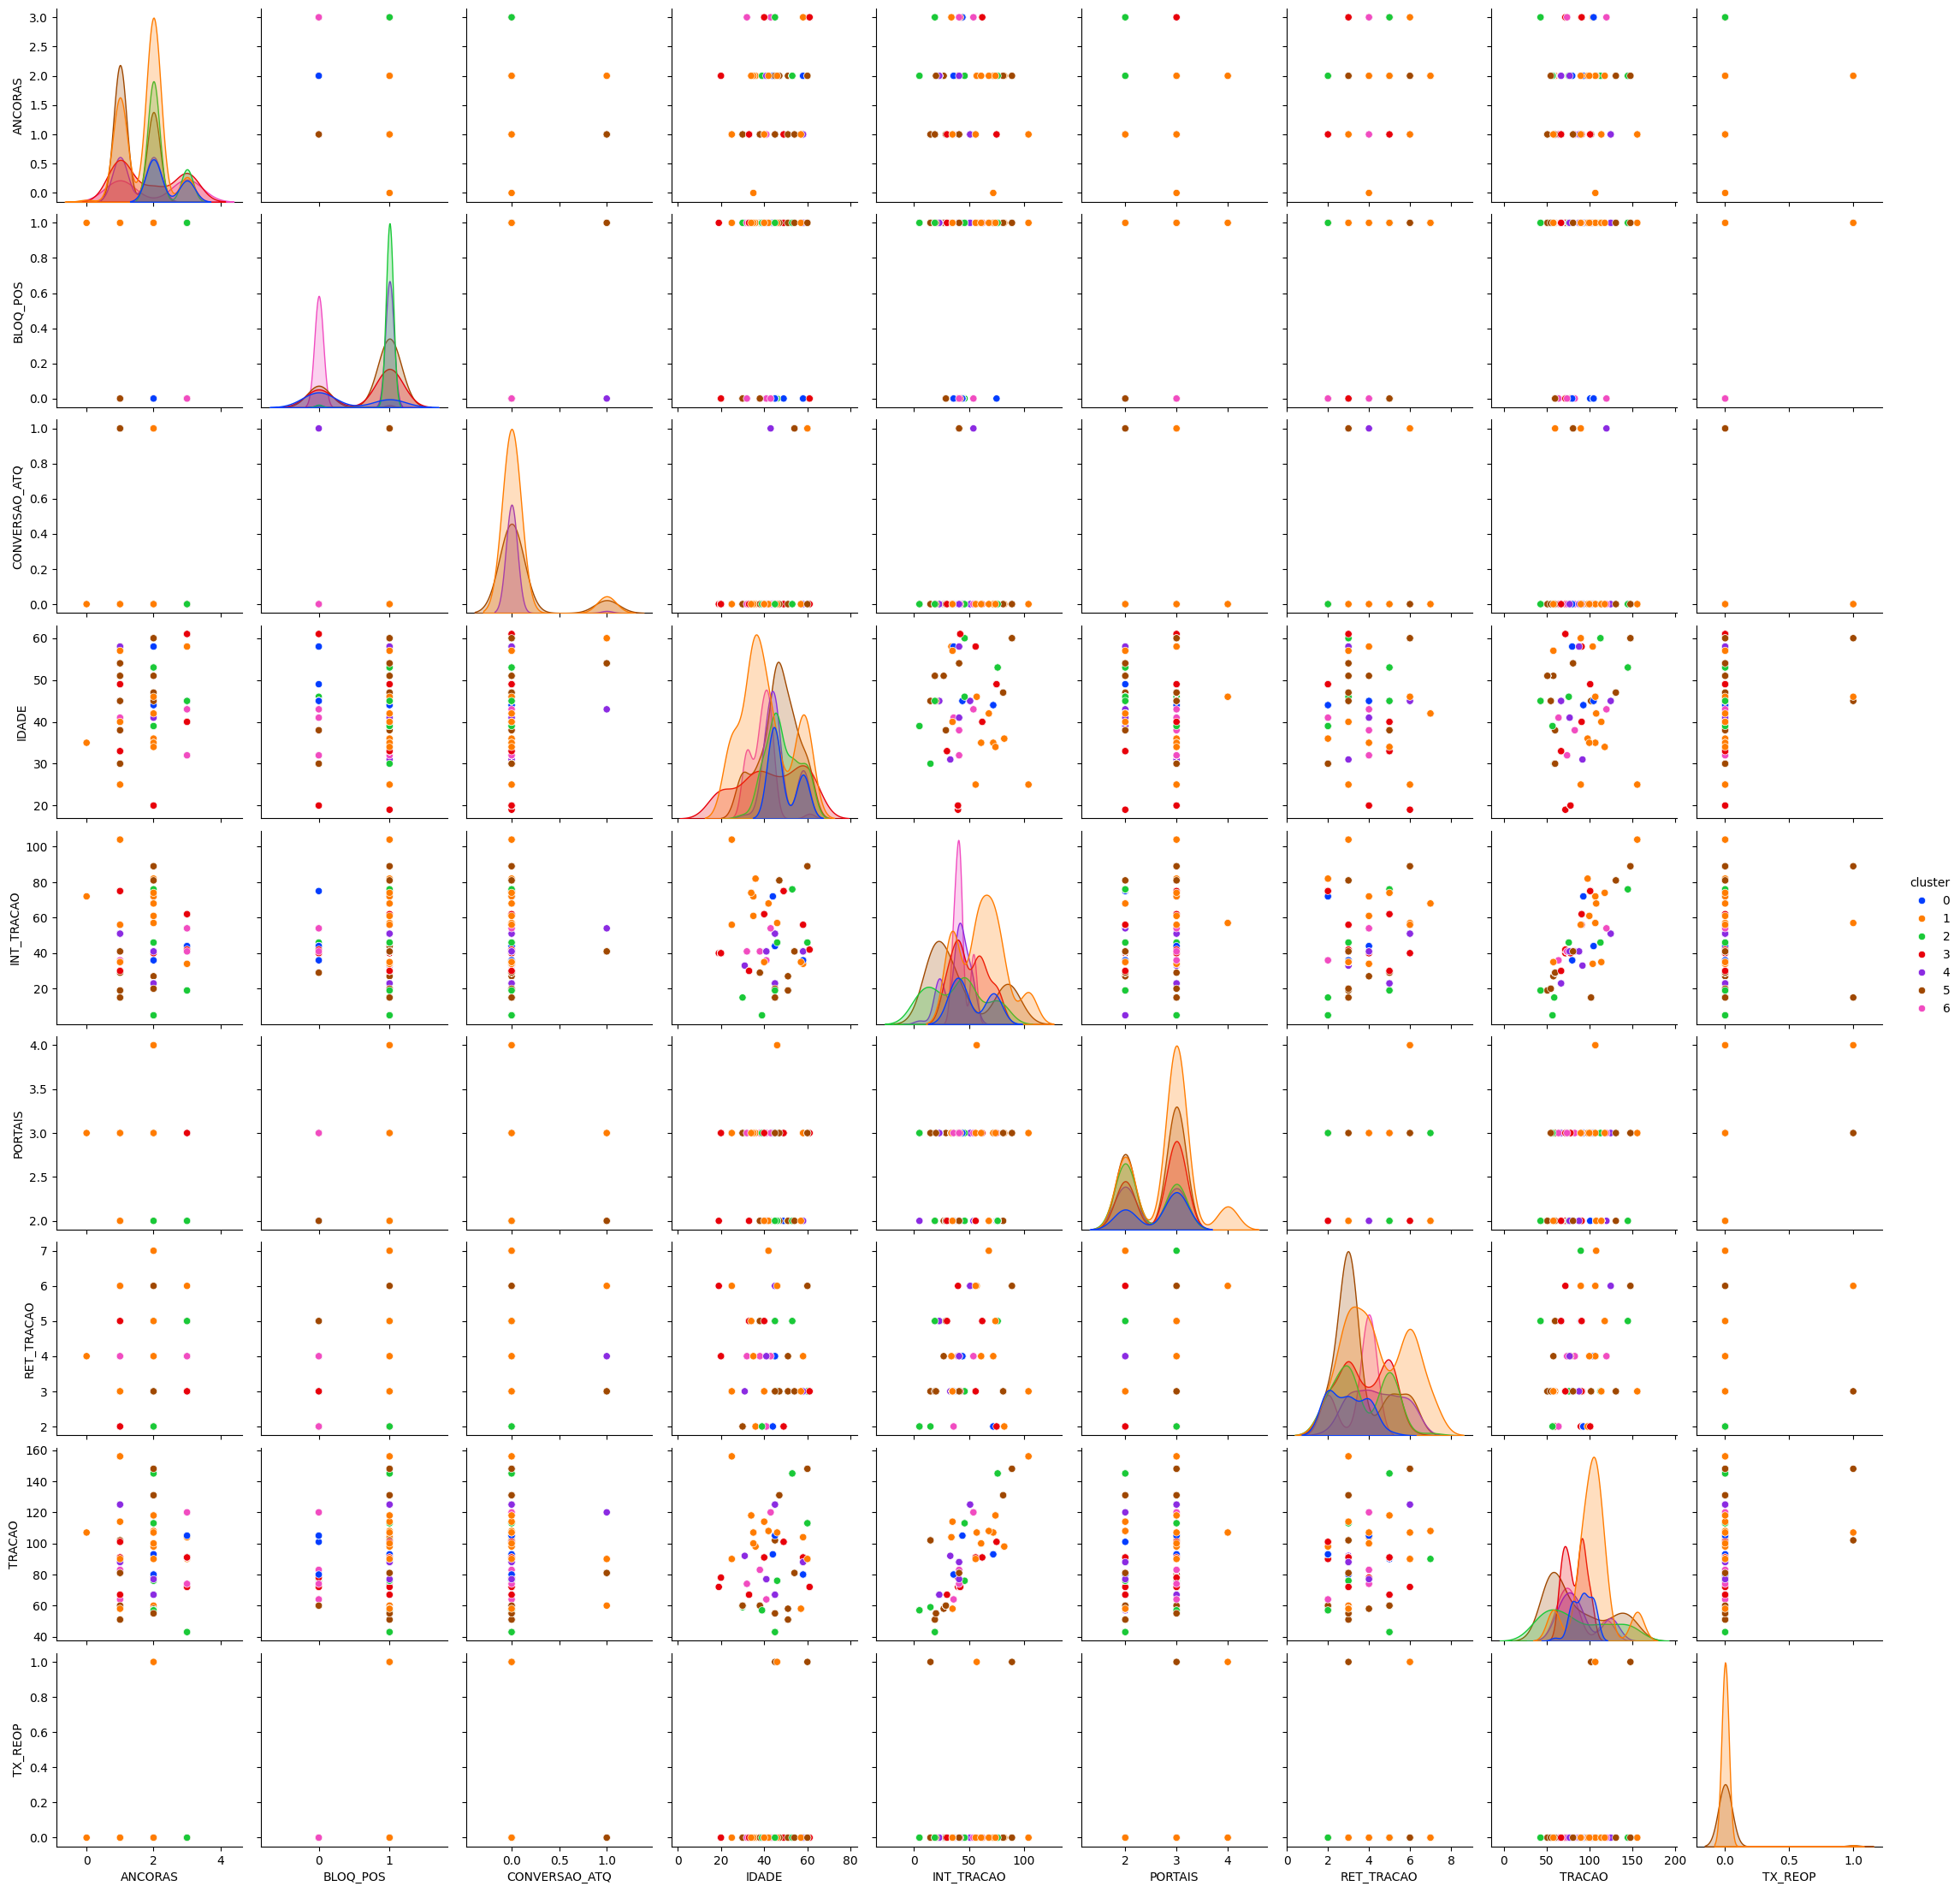

In [ ]:
sns.pairplot(X5[numerical_features5.union(['cluster'])], hue='cluster', palette='bright')
plt.show()

In [ ]:
# Busca de associação dos clusters definidos anteriormente com a presença de complicaçoes (COMPL)

# Concatenando X5 e y5
X5_COMPL = pd.concat([X5, y5], axis=1)

# Calculando a média de COMPL por cluster
complications_by_cluster = X5_COMPL.groupby('cluster')['COMPL'].mean()
print(complications_by_cluster)

# Ordenar os clusters pela média de COMPL
sorted_clusters = complications_by_cluster.sort_values(ascending=False)
print("\nClusters ordenados por proporção de complicações:\n", sorted_clusters)

cluster
0    0.000000
1    0.343195
2    0.408451
3    0.000000
4    0.000000
5    0.247788
6    0.000000
Name: COMPL, dtype: float64

Clusters ordenados por proporção de complicações:
 cluster
2    0.408451
1    0.343195
5    0.247788
0    0.000000
3    0.000000
4    0.000000
6    0.000000
Name: COMPL, dtype: float64


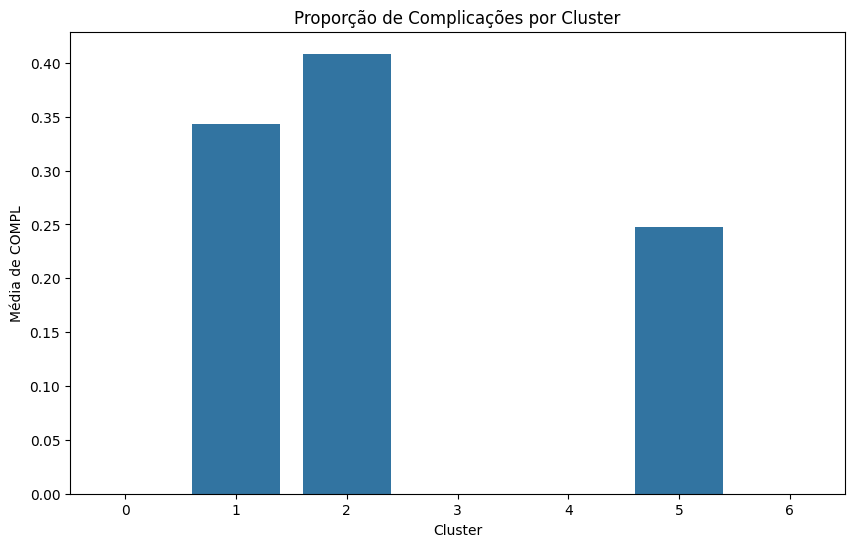

In [ ]:
# Visualização gráfica do índice de complicações por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_clusters.index, y=sorted_clusters.values)
plt.title('Proporção de Complicações por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de COMPL')
plt.show()

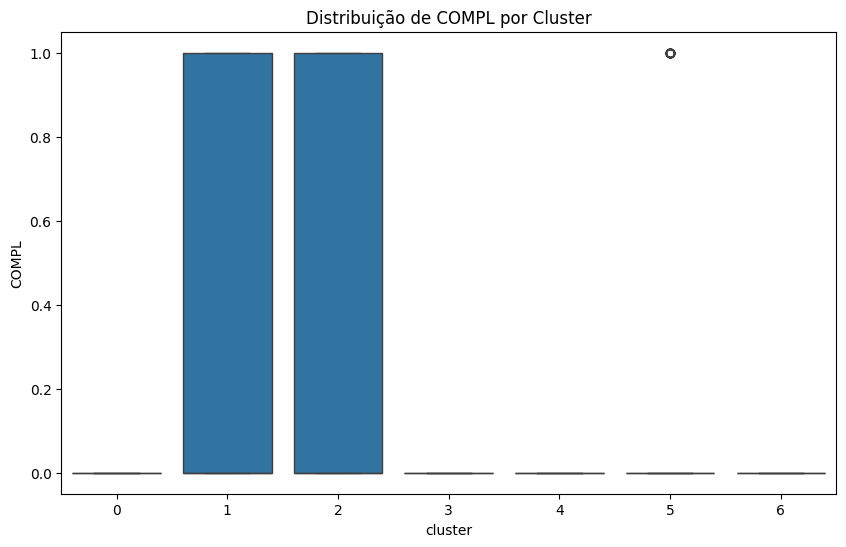

In [ ]:
# Análise da distribuição de complicações por cluster definido

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='COMPL', data=X5_COMPL)
plt.title('Distribuição de COMPL por Cluster')
plt.show()

In [ ]:
# Análise das variáveis numéricas dos clusteres com a maior média de COMPL (1 e 2)

clusteres_com_mais_complicacoes1 = sorted_clusters.index[0]
X5_cluster1 = X5_COMPL[X5_COMPL['cluster'] == clusteres_com_mais_complicacoes1]
clusteres_com_mais_complicacoes2 = sorted_clusters.index[1]
X5_cluster2 = X5_COMPL[X5_COMPL['cluster'] == clusteres_com_mais_complicacoes2]
print(X5_cluster1.describe().applymap("{:.2f}".format))
print(X5_cluster2.describe().applymap("{:.2f}".format))

       IDADE  TRACAO RET_TRACAO INT_TRACAO PORTAIS BLOQ_POS CONVERSAO_ATQ  \
count  70.00   71.00      71.00      70.00   71.00    71.00         70.00   
mean   48.44   86.52       3.65      38.47    2.41     0.99          0.00   
std     7.49   37.26       1.27      24.58    0.50     0.12          0.00   
min    30.00   43.00       2.00       5.00    2.00     0.00          0.00   
25%    45.00   57.00       3.00      19.00    2.00     1.00          0.00   
50%    46.00   76.00       3.00      46.00    2.00     1.00          0.00   
75%    53.00  113.00       5.00      46.00    3.00     1.00          0.00   
max    60.00  145.00       7.00      76.00    3.00     1.00          0.00   

      ANCORAS TX_REOP cluster  COMPL  
count   66.00   66.00   71.00  71.00  
mean     2.21    0.00    2.00   0.41  
std      0.41    0.00    0.00   0.50  
min      2.00    0.00    2.00   0.00  
25%      2.00    0.00    2.00   0.00  
50%      2.00    0.00    2.00   0.00  
75%      2.00    0.00    2.00   1

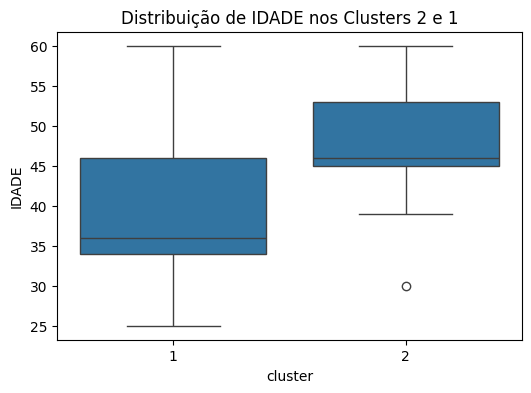

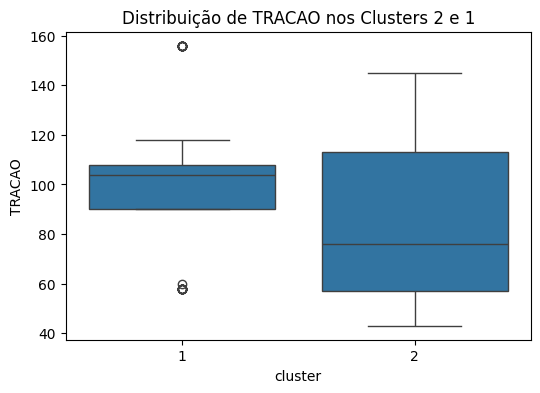

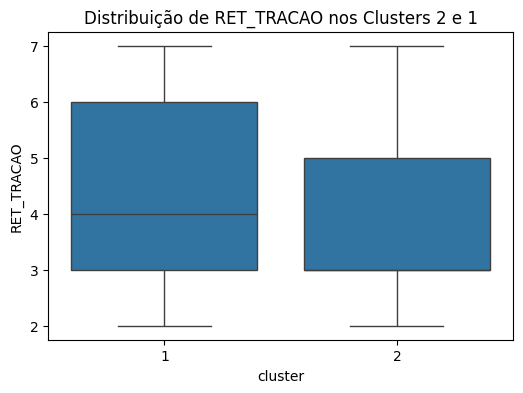

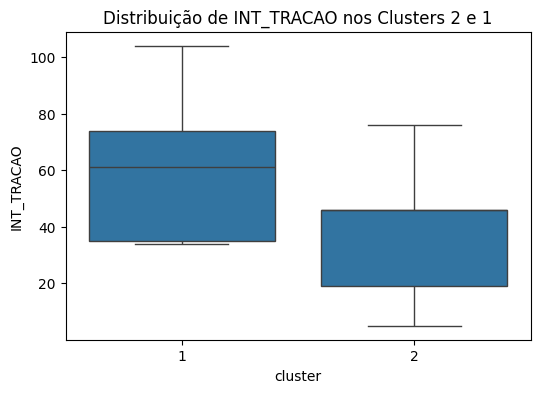

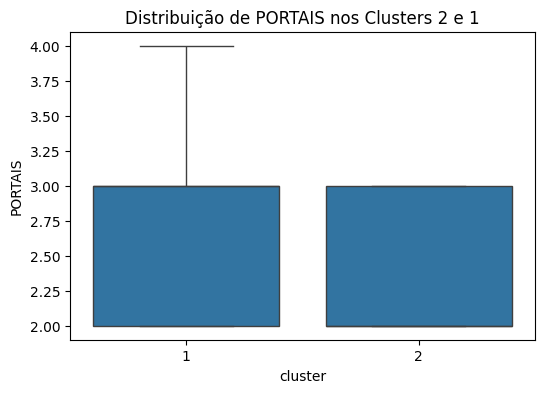

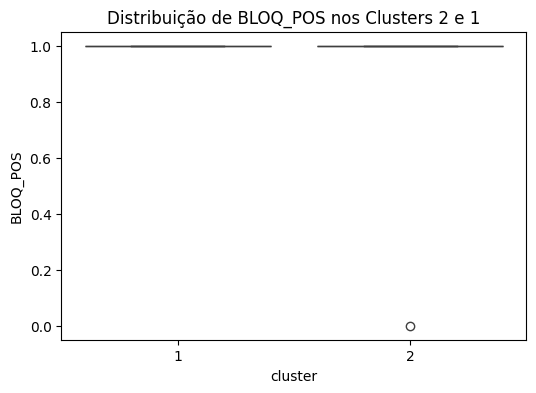

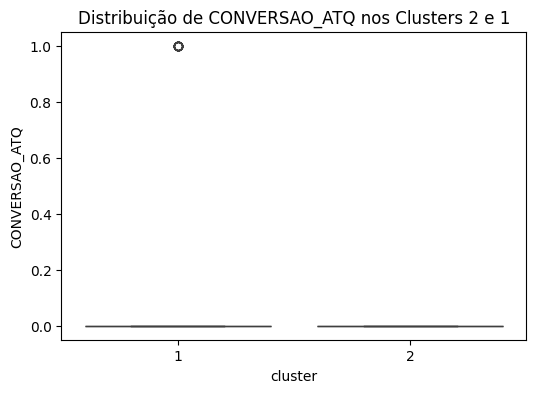

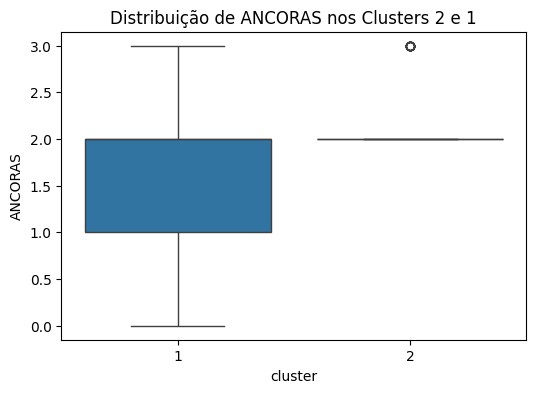

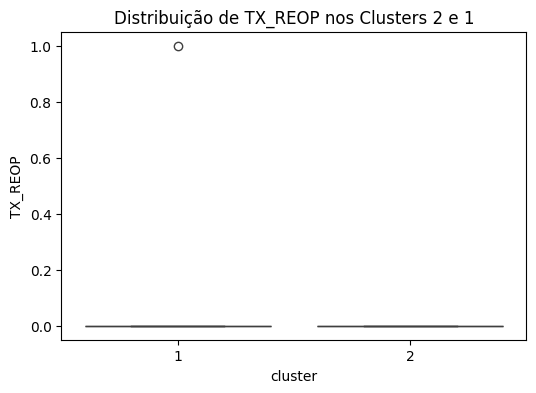

In [ ]:
# Análise gráfica das variáveis numéricas com boxplots para comparação entre os 2 clusteres mais associados à complicações

X5_filtered = X5_COMPL[X5_COMPL['cluster'].isin([clusteres_com_mais_complicacoes1, clusteres_com_mais_complicacoes2])]

for column in numerical_features5:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=column, data=X5_filtered)
    plt.title(f'Distribuição de {column} nos Clusters {clusteres_com_mais_complicacoes1} e {clusteres_com_mais_complicacoes2}')
    plt.show()

In [ ]:
# Comparando a média de valores das variaveis numericas dos 2 clusteres mais associados a complicações com a média dos demais clusteres

clusters_alvo = [clusteres_com_mais_complicacoes1, clusteres_com_mais_complicacoes2]
medias_alvo = X5_COMPL[X5_COMPL['cluster'].isin(clusters_alvo)].groupby('cluster')[numerical_features5].mean()

medias_demais = X5_COMPL[~X5_COMPL['cluster'].isin(clusters_alvo)].groupby('cluster')[numerical_features5].mean()
medias_demais_geral = medias_demais.mean()

# Criando um DataFrame comparativo
comparacao = pd.DataFrame({
    'Clusters Alvo (Média)': medias_alvo.mean(),
    'Demais Clusters (Média Geral)': medias_demais_geral
})

print(comparacao)

# Calculando a diferença percentual entre os clusteres alvo e os demais
diferenca_percentual = (medias_alvo.mean() - medias_demais_geral) / medias_demais_geral * 100
comparacao['Diferença Percentual'] = diferenca_percentual

print("\nComparação com diferença percentual:\n", comparacao)

               Clusters Alvo (Média)  Demais Clusters (Média Geral)
IDADE                      44.669913                      44.740045
TRACAO                     95.148137                      86.733655
RET_TRACAO                  4.028086                       3.616194
INT_TRACAO                 50.077820                      45.109711
PORTAIS                     2.615468                       2.681408
BLOQ_POS                    0.992958                       0.559063
CONVERSAO_ATQ               0.041420                       0.028571
ANCORAS                     1.973530                       1.818825
TX_REOP                     0.003012                       0.003704

Comparação com diferença percentual:
                Clusters Alvo (Média)  Demais Clusters (Média Geral)  \
IDADE                      44.669913                      44.740045   
TRACAO                     95.148137                      86.733655   
RET_TRACAO                  4.028086                       3.616194 

**Conclusão (variáveis numéricas):**

As variáveis BLOQ_POS, CONVERSAO_ATQ, TRACAO, RET_TRACAO e INT_TRACAO parecem ser as mais relevantes para distinguir os clusters com maior risco de complicações.  A BLOQ_POS se destaca como o fator mais importante, seguida pela CONVERSAO_ATQ.  As demais variáveis apresentam diferenças menores ou inconsistentes, sugerindo menor importância na ocorrência de complicações.

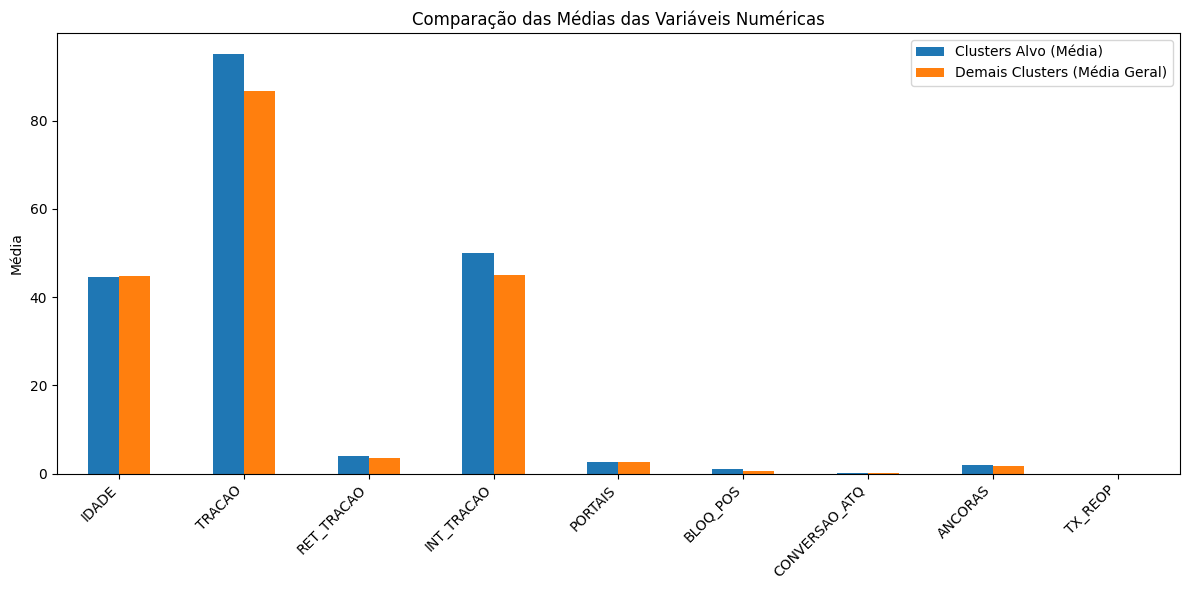

In [ ]:

# Visualizar as diferenças com um gráfico de barras
comparacao[['Clusters Alvo (Média)', 'Demais Clusters (Média Geral)']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparação das Médias das Variáveis Numéricas')
plt.ylabel('Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Tabela de variáveis categóricas para SEXO:
 SEXO       F    M
cluster          
1        0.0  1.0
2        1.0  0.0


<Figure size 1000x600 with 0 Axes>

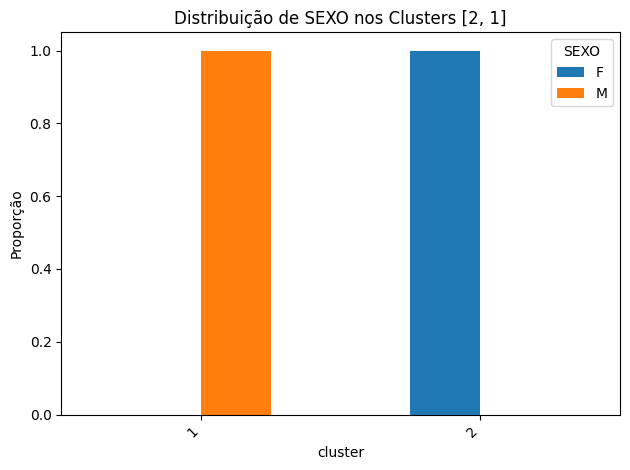


Tabela de variáveis categóricas para LADO:
 LADO            D         E
cluster                    
1        0.591716  0.408284
2        0.000000  1.000000


<Figure size 1000x600 with 0 Axes>

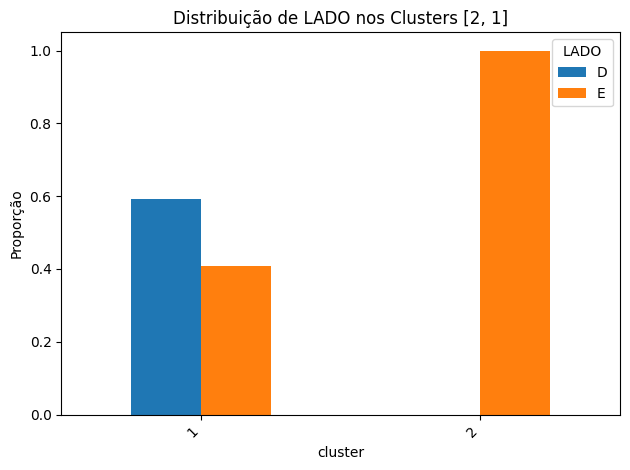


Tabela de variáveis categóricas para INDICACAO:
 INDICACAO   CONDRAL   LABRAL  LABRAL-CONDRAL
cluster                                     
1          0.000000  0.08284        0.917160
2          0.014085  0.00000        0.985915


<Figure size 1000x600 with 0 Axes>

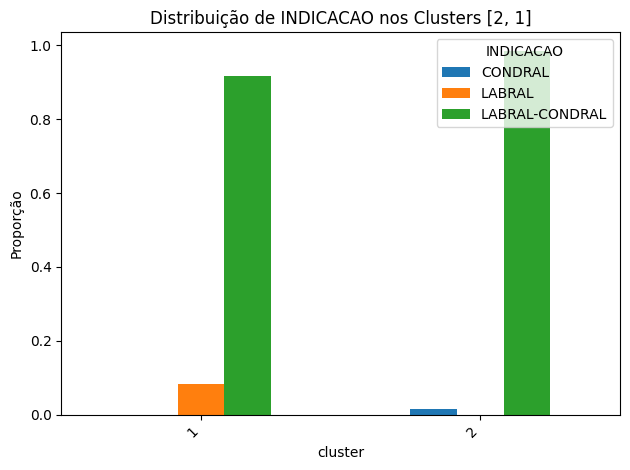


Tabela de variáveis categóricas para IFA:
 IFA           CAM     MISTO    PINCER
cluster                              
1        0.165680  0.834320  0.000000
2        0.408451  0.197183  0.394366


<Figure size 1000x600 with 0 Axes>

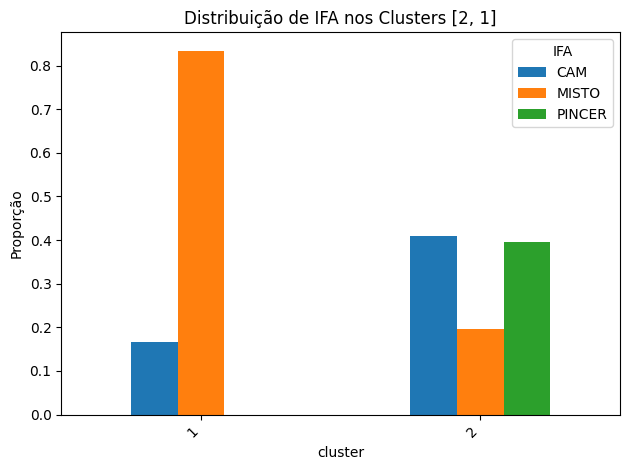


Tabela de variáveis categóricas para TIPO:
 TIPO     DOR MIOFASCIAL       DSR  NEUROPRAXIA
cluster                                       
1              0.965517  0.000000     0.034483
2              0.931034  0.068966     0.000000


<Figure size 1000x600 with 0 Axes>

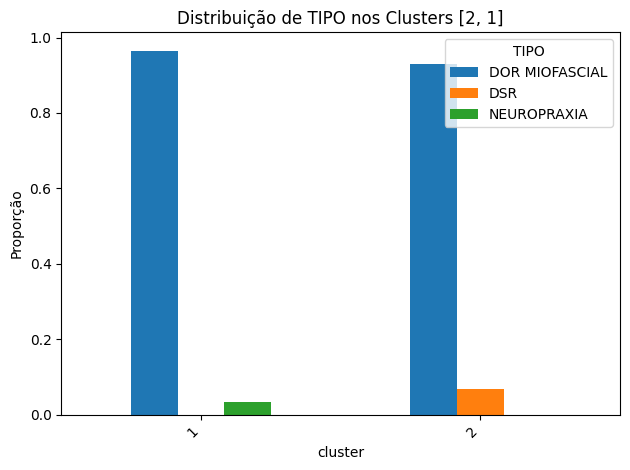

In [ ]:
# Análise das variáveis categóricas dos clusteres com a maior média de COMPL (1 e 2)

for column in categorical_features5:
    cat_table = pd.crosstab(X5_COMPL[X5_COMPL['cluster'].isin(clusters_alvo)]['cluster'], X5_COMPL[X5_COMPL['cluster'].isin(clusters_alvo)][column], normalize='index')

    print(f"\nTabela de variáveis categóricas para {column}:\n", cat_table)

    # Visualizar com gráfico de barras
    plt.figure(figsize=(10, 6))
    cat_table.plot(kind='bar')
    plt.title(f'Distribuição de {column} nos Clusters {clusters_alvo}')
    plt.ylabel('Proporção')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=column) # Adiciona título à legenda
    plt.tight_layout()
    plt.show()

In [ ]:
# Comparação das variáveis categóricas dos clusteres mais associados à complicações com os demais clusteres

for column in categorical_features5:
    distribuicao_alvo = X5_COMPL[X5_COMPL['cluster'].isin(clusters_alvo)][column].value_counts(normalize=True)
    distribuicao_demais = X5_COMPL[~X5_COMPL['cluster'].isin(clusters_alvo)][column].value_counts(normalize=True)

    print(f"\nDistribuição de {column}:")
    print(f"Clusters Alvo:\n{distribuicao_alvo}")
    print(f"Demais Clusters:\n{distribuicao_demais}")


Distribuição de SEXO:
Clusters Alvo:
SEXO
M    0.704167
F    0.295833
Name: proportion, dtype: float64
Demais Clusters:
SEXO
F    0.600583
M    0.399417
Name: proportion, dtype: float64

Distribuição de LADO:
Clusters Alvo:
LADO
E    0.583333
D    0.416667
Name: proportion, dtype: float64
Demais Clusters:
LADO
D    0.681159
E    0.318841
Name: proportion, dtype: float64

Distribuição de INDICACAO:
Clusters Alvo:
INDICACAO
LABRAL-CONDRAL    0.937500
LABRAL            0.058333
CONDRAL           0.004167
Name: proportion, dtype: float64
Demais Clusters:
INDICACAO
LABRAL            0.430233
LABRAL-CONDRAL    0.293605
CONDRAL           0.276163
Name: proportion, dtype: float64

Distribuição de IFA:
Clusters Alvo:
IFA
MISTO     0.645833
CAM       0.237500
PINCER    0.116667
Name: proportion, dtype: float64
Demais Clusters:
IFA
PINCER    0.689150
MISTO     0.190616
CAM       0.120235
Name: proportion, dtype: float64

Distribuição de TIPO:
Clusters Alvo:
TIPO
DOR MIOFASCIAL    0.954023
DSR   

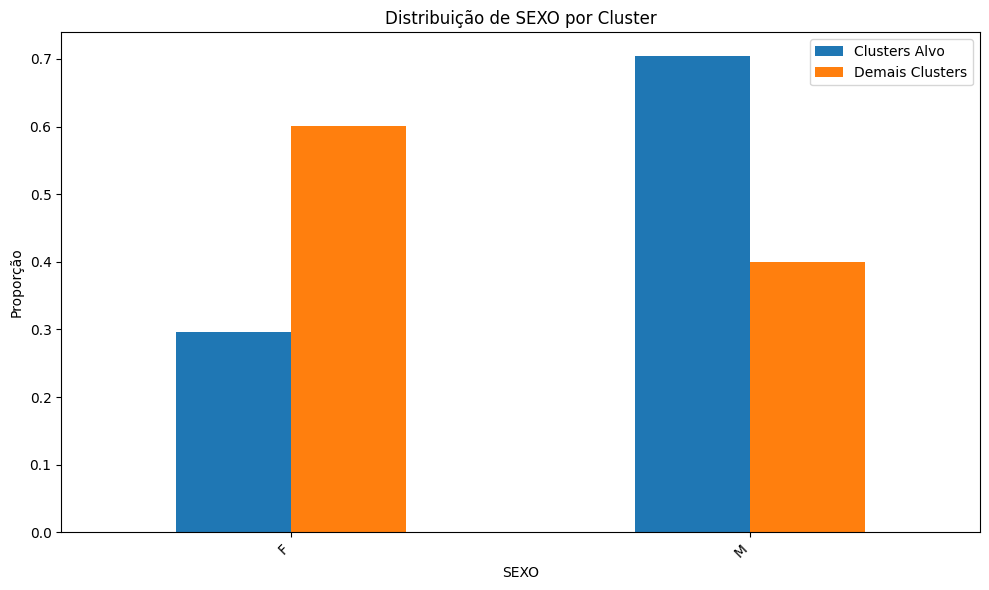

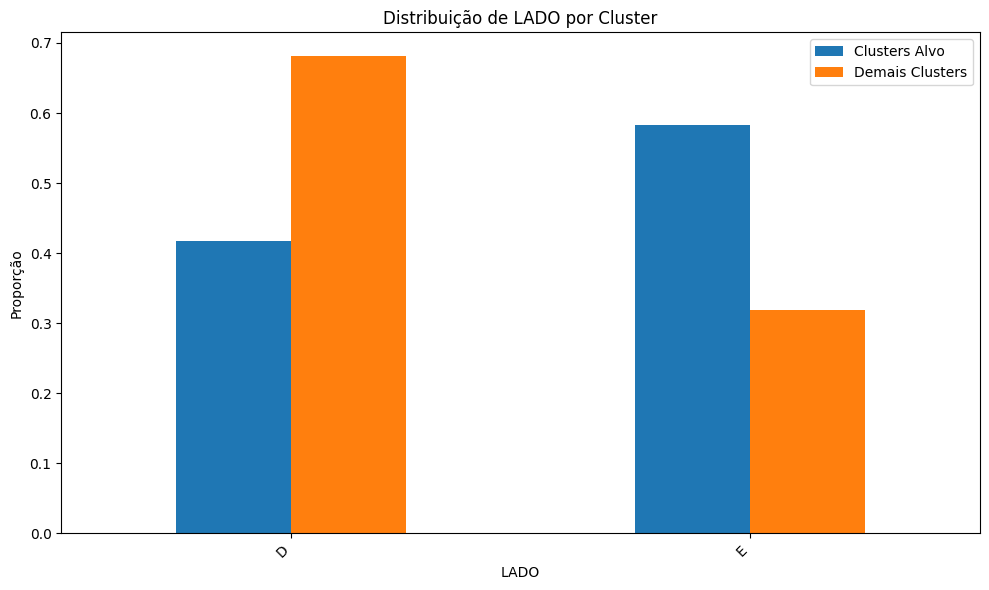

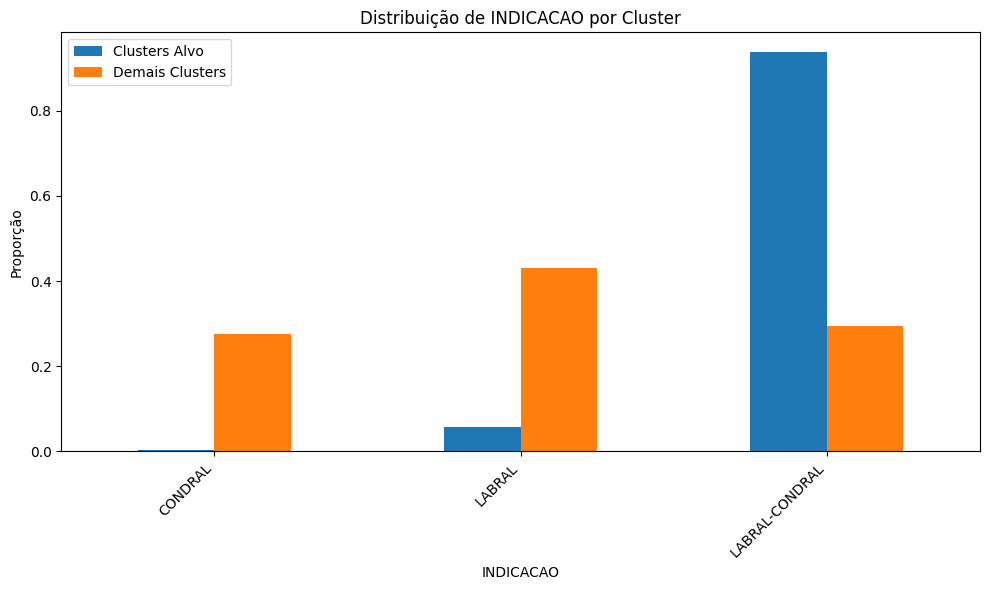

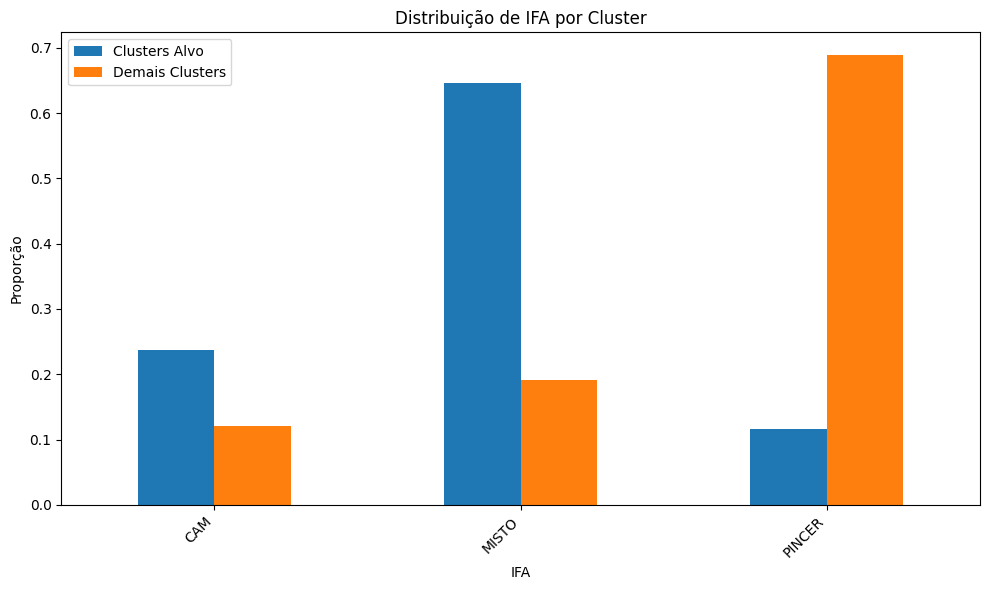

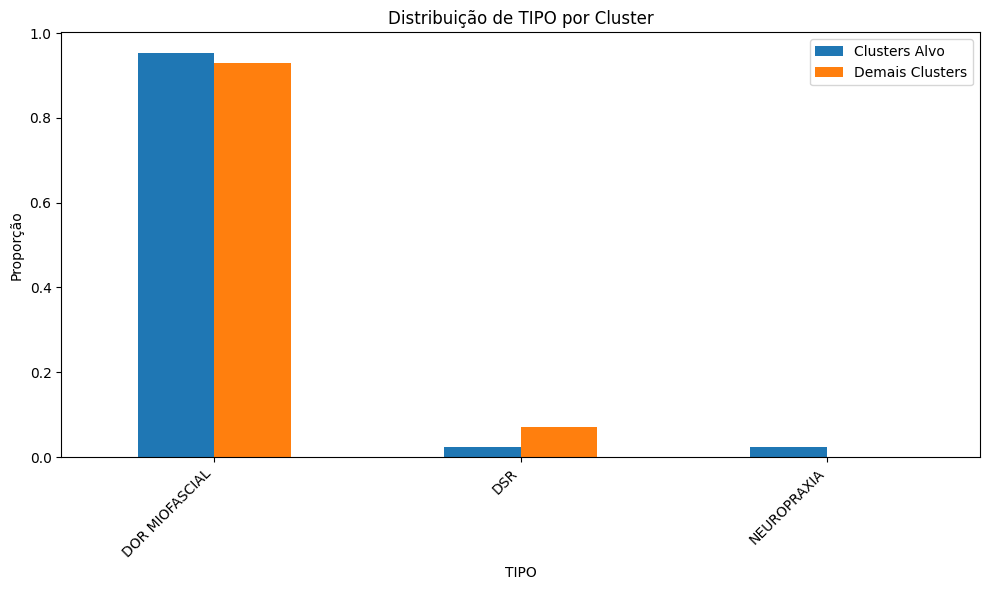

In [ ]:
# Análise gráfica comparativa das variáveis categóricas entre os clusteres alvo e os demais

for column in categorical_features5:
    proporcoes_alvo = X5_COMPL[X5_COMPL['cluster'].isin(clusters_alvo)][column].value_counts(normalize=True)
    proporcoes_demais = X5_COMPL[~X5_COMPL['cluster'].isin(clusters_alvo)][column].value_counts(normalize=True)

    df_proporcoes = pd.DataFrame({
        'Clusters Alvo': proporcoes_alvo,
        'Demais Clusters': proporcoes_demais
    }).fillna(0)

    # Plotando o gráfico de barras agrupadas
    df_proporcoes.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribuição de {column} por Cluster')
    plt.ylabel('Proporção')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Conclusão (variáveis categóricas):**

As variáveis INDICACAO e IFA parecem ser as mais importantes para distinguir os clusters com maior risco de complicações. A combinação de lesões labral e condral (LABRAL-CONDRAL) e o tipo de impacto femoroacetabular "MISTO" parecem estar fortemente associados a um maior risco de complicações, enquanto o tipo "PINCER" parece exercer um fator de proteção às complicações. As demais variáveis não aparentam ser determinantes para o desenvolvimento de complicações pós-operatórias.

# **DEPLOY EM PRODUÇÃO DO MODELO DE PREDIÇÃO**

In [ ]:
# Realizando o deploy do modelo em produção para testes

# Nome do arquivo pickle
nome_arquivo = "modelo_artroquadril.pkl"

modelo_escolhido = grid_search5.best_estimator_

# Salvar o modelo
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_escolhido, arquivo)